In [283]:
import pandas as pd
import numpy as np
import scipy
import re
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from sklearn import metrics, decomposition
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler


pd.set_option('display.width', 120)
sns.set_style('ticks')
regular_expression = '_∆=(?P<delta>.+) % => ANT=(?P<step_ant>\d{1,5}), s=(?P<std_ant>\d{1,5}\.\d), L=(?P<n_ant>\d{1,5}) --> NEW=(?P<step_new>\d{1,5}), s=(?P<std_new>\d{1,5}\.\d), L=(?P<n_new>\d{1,5})'
regex = re.compile(regular_expression)

signal_bad = ', BAD_STEP'

raw_text = '''08:51:20_∆=inf % => ANT=0, s=0.0, L=1 --> NEW=213, s=2.6, L=20
08:51:46_∆=395.1 % => ANT=213, s=2.6, L=20 --> NEW=1053, s=245.1, L=26
08:52:32_∆=87.0 % => ANT=1053, s=245.1, L=26 --> NEW=1970, s=53.1, L=46
08:52:40_∆=-2.3 % => ANT=1970, s=53.1, L=46 --> NEW=1924, s=80.9, L=8, BAD_STEP
08:54:33_∆=-47.4 % => ANT=1924, s=80.9, L=8 --> NEW=1012, s=23.2, L=113
08:54:41_∆=-9.5 % => ANT=1012, s=23.2, L=113 --> NEW=916, s=165.1, L=8, BAD_STEP
08:55:55_∆=-75.8 % => ANT=916, s=165.1, L=8 --> NEW=221, s=4.3, L=74
08:56:04_∆=8.4 % => ANT=221, s=4.3, L=74 --> NEW=240, s=10.4, L=9, BAD_STEP
08:56:34_∆=380.5 % => ANT=240, s=10.4, L=9 --> NEW=1152, s=136.0, L=30
08:59:04_∆=-80.1 % => ANT=1152, s=136.0, L=30 --> NEW=229, s=62.8, L=150
08:59:31_∆=667.0 % => ANT=229, s=62.8, L=150 --> NEW=1759, s=251.7, L=27
08:59:44_∆=63.2 % => ANT=1759, s=251.7, L=27 --> NEW=2871, s=404.9, L=13
09:00:19_∆=-43.7 % => ANT=2871, s=404.9, L=13 --> NEW=1617, s=62.9, L=35
09:00:36_∆=-74.9 % => ANT=1617, s=62.9, L=35 --> NEW=406, s=380.4, L=17
09:01:09_∆=269.3 % => ANT=406, s=380.4, L=17 --> NEW=1498, s=167.9, L=33

13:51:15_∆=inf % => ANT=0, s=0.0, L=1 --> NEW=251, s=3.8, L=375

09:19:59_∆=inf % => ANT=0, s=0.0, L=1 --> NEW=234, s=8.8, L=4799
11:16:18_∆=3.7 % => ANT=234, s=8.8, L=4799 --> NEW=242, s=14.3, L=6979
13:13:08_∆=-0.3 % => ANT=242, s=14.3, L=6979 --> NEW=242, s=20.1, L=7010
13:51:15_∆=5.5 % => ANT=242, s=20.1, L=7010 --> NEW=255, s=15.9, L=2287

19:35:39_∆=inf % => ANT=0, s=0.0, L=1 --> NEW=264, s=4.6, L=339
19:36:44_∆=30.9 % => ANT=264, s=4.6, L=339 --> NEW=345, s=17.7, L=65
19:36:55_∆=16.7 % => ANT=345, s=17.7, L=65 --> NEW=403, s=18.9, L=11
19:43:37_∆=328.3 % => ANT=403, s=18.9, L=11 --> NEW=1727, s=30.7, L=402
19:43:45_∆=-2.5 % => ANT=1727, s=30.7, L=402 --> NEW=1683, s=111.2, L=8, BAD_STEP
19:45:02_∆=-79.0 % => ANT=1683, s=111.2, L=8 --> NEW=353, s=43.0, L=77
19:46:45_∆=383.1 % => ANT=353, s=43.0, L=77 --> NEW=1704, s=125.3, L=103
19:46:53_∆=-40.4 % => ANT=1704, s=125.3, L=103 --> NEW=1015, s=598.4, L=8
19:47:49_∆=-66.1 % => ANT=1015, s=598.4, L=8 --> NEW=344, s=4.3, L=56
19:47:57_∆=49.6 % => ANT=344, s=4.3, L=56 --> NEW=514, s=432.2, L=8
20:01:30_∆=239.3 % => ANT=514, s=432.2, L=8 --> NEW=1744, s=22.1, L=813
20:01:38_∆=-2.9 % => ANT=1744, s=22.1, L=813 --> NEW=1695, s=109.7, L=8, BAD_STEP
20:01:48_∆=-75.3 % => ANT=1695, s=109.7, L=8 --> NEW=419, s=117.2, L=10
20:04:03_∆=299.4 % => ANT=419, s=117.2, L=10 --> NEW=1672, s=125.5, L=135
20:04:18_∆=-72.1 % => ANT=1672, s=125.5, L=135 --> NEW=466, s=247.7, L=15
20:07:27_∆=264.1 % => ANT=466, s=247.7, L=15 --> NEW=1698, s=34.2, L=189
20:08:46_∆=-1.3 % => ANT=1698, s=34.2, L=189 --> NEW=1676, s=9.3, L=79, xxBAD_STEP
20:29:20_∆=-77.0 % => ANT=1676, s=9.3, L=79 --> NEW=385, s=37.5, L=1234
20:30:54_∆=337.4 % => ANT=385, s=37.5, L=1234 --> NEW=1686, s=237.6, L=94
20:31:02_∆=1.9 % => ANT=1686, s=237.6, L=94 --> NEW=1718, s=8.7, L=8, BAD_STEP
20:38:01_∆=-79.1 % => ANT=1718, s=8.7, L=8 --> NEW=359, s=81.2, L=419

#mark
20:40:28_∆=124.8 % => ANT=359, s=81.2, L=419 --> NEW=806, s=97.4, L=147, BAD_STEP
20:41:15_∆=-1.4 % => ANT=806, s=97.4, L=147 --> NEW=794, s=65.4, L=47, BAD_STEP
20:42:21_∆=1.9 % => ANT=794, s=65.4, L=47 --> NEW=809, s=67.6, L=66, BAD_STEP
20:43:35_∆=2.0 % => ANT=809, s=67.6, L=66 --> NEW=825, s=71.3, L=74, BAD_STEP
20:47:10_∆=-4.0 % => ANT=825, s=71.3, L=74 --> NEW=793, s=111.0, L=215, BAD_STEP
20:47:55_∆=-1.5 % => ANT=793, s=111.0, L=215 --> NEW=781, s=87.8, L=45, BAD_STEP
20:51:07_∆=2.4 % => ANT=781, s=87.8, L=45 --> NEW=800, s=98.1, L=192, BAD_STEP
20:51:57_∆=3.4 % => ANT=800, s=98.1, L=192 --> NEW=827, s=94.9, L=50, BAD_STEP
20:52:50_∆=0.2 % => ANT=827, s=94.9, L=50 --> NEW=829, s=106.9, L=53, BAD_STEP
20:57:16_∆=-1.6 % => ANT=829, s=106.9, L=53 --> NEW=815, s=104.0, L=266, BAD_STEP
20:57:37_∆=0.9 % => ANT=815, s=104.0, L=266 --> NEW=823, s=114.3, L=21, BAD_STEP
20:58:52_∆=0.0 % => ANT=823, s=114.3, L=21 --> NEW=823, s=96.5, L=75, BAD_STEP
20:59:04_∆=-1.4 % => ANT=823, s=96.5, L=75 --> NEW=812, s=109.5, L=12, BAD_STEP
20:59:40_∆=-6.0 % => ANT=812, s=109.5, L=12 --> NEW=763, s=68.5, L=36, BAD_STEP
20:59:56_∆=13.0 % => ANT=763, s=68.5, L=36 --> NEW=862, s=34.4, L=16, BAD_STEP
21:05:49_∆=-7.8 % => ANT=862, s=34.4, L=16 --> NEW=795, s=119.6, L=353, BAD_STEP
21:07:16_∆=3.2 % => ANT=795, s=119.6, L=353 --> NEW=821, s=92.4, L=87, BAD_STEP
21:08:07_∆=-1.0 % => ANT=821, s=92.4, L=87 --> NEW=813, s=145.0, L=51, BAD_STEP
21:13:05_∆=-2.2 % => ANT=813, s=145.0, L=51 --> NEW=795, s=127.1, L=298, BAD_STEP
21:13:45_∆=-1.3 % => ANT=795, s=127.1, L=298 --> NEW=785, s=143.5, L=40, BAD_STEP
21:16:43_∆=-0.2 % => ANT=785, s=143.5, L=40 --> NEW=784, s=139.6, L=178, BAD_STEP
21:17:44_∆=-3.0 % => ANT=784, s=139.6, L=178 --> NEW=760, s=172.5, L=61, BAD_STEP
21:20:00_∆=12.0 % => ANT=760, s=172.5, L=61 --> NEW=852, s=124.1, L=136, BAD_STEP
21:22:31_∆=-3.6 % => ANT=852, s=124.1, L=136 --> NEW=821, s=132.3, L=151, BAD_STEP
21:24:21_∆=4.7 % => ANT=821, s=132.3, L=151 --> NEW=860, s=137.2, L=110, BAD_STEP
21:24:51_∆=2.5 % => ANT=860, s=137.2, L=110 --> NEW=881, s=115.5, L=30, BAD_STEP
21:26:11_∆=-4.3 % => ANT=881, s=115.5, L=30 --> NEW=843, s=121.0, L=80, BAD_STEP
21:32:43_∆=2.8 % => ANT=843, s=121.0, L=80 --> NEW=867, s=144.9, L=392, BAD_STEP
21:33:32_∆=-6.5 % => ANT=867, s=144.9, L=392 --> NEW=810, s=185.0, L=49, BAD_STEP
21:35:13_∆=2.5 % => ANT=810, s=185.0, L=49 --> NEW=830, s=172.6, L=101, BAD_STEP

21:40:14_∆=-52.9 % => ANT=830, s=172.6, L=101 --> NEW=391, s=5.6, L=301
21:41:10_∆=-7.7 % => ANT=391, s=5.6, L=301 --> NEW=360, s=8.4, L=56

21:49:05_∆=124.3 % => ANT=360, s=8.4, L=56 --> NEW=808, s=120.9, L=475
21:54:21_∆=2.0 % => ANT=808, s=120.9, L=475 --> NEW=825, s=118.5, L=316, BAD_STEP
21:54:55_∆=7.4 % => ANT=825, s=118.5, L=316 --> NEW=885, s=97.2, L=34, BAD_STEP
21:55:33_∆=-1.7 % => ANT=885, s=97.2, L=34 --> NEW=870, s=120.5, L=38, BAD_STEP
21:56:39_∆=-1.3 % => ANT=870, s=120.5, L=38 --> NEW=859, s=105.2, L=66, BAD_STEP
21:58:24_∆=-5.1 % => ANT=859, s=105.2, L=66 --> NEW=815, s=129.9, L=105, BAD_STEP
21:58:58_∆=3.7 % => ANT=815, s=129.9, L=105 --> NEW=845, s=82.8, L=34, BAD_STEP
21:59:57_∆=-5.0 % => ANT=845, s=82.8, L=34 --> NEW=803, s=100.2, L=59, BAD_STEP
22:00:07_∆=-9.5 % => ANT=803, s=100.2, L=59 --> NEW=727, s=107.2, L=10, BAD_STEP
22:02:48_∆=12.3 % => ANT=727, s=107.2, L=10 --> NEW=816, s=113.3, L=161, BAD_STEP
22:04:34_∆=-5.5 % => ANT=816, s=113.3, L=161 --> NEW=771, s=148.4, L=106, BAD_STEP
22:08:45_∆=2.9 % => ANT=771, s=148.4, L=106 --> NEW=794, s=133.9, L=251, BAD_STEP
22:10:51_∆=11.5 % => ANT=794, s=133.9, L=251 --> NEW=885, s=105.3, L=126, BAD_STEP
22:17:18_∆=-2.1 % => ANT=885, s=105.3, L=126 --> NEW=867, s=103.0, L=387, BAD_STEP
22:18:29_∆=-1.4 % => ANT=867, s=103.0, L=387 --> NEW=855, s=121.5, L=71, BAD_STEP
22:19:22_∆=0.4 % => ANT=855, s=121.5, L=71 --> NEW=858, s=72.6, L=53, BAD_STEP
22:21:17_∆=0.7 % => ANT=858, s=72.6, L=53 --> NEW=864, s=117.6, L=115, BAD_STEP
22:27:01_∆=-2.7 % => ANT=864, s=117.6, L=115 --> NEW=841, s=101.9, L=344, BAD_STEP
22:27:42_∆=-4.5 % => ANT=841, s=101.9, L=344 --> NEW=803, s=123.1, L=41, BAD_STEP
22:31:31_∆=3.3 % => ANT=803, s=123.1, L=41 --> NEW=829, s=115.3, L=229, BAD_STEP
22:32:55_∆=-1.1 % => ANT=829, s=115.3, L=229 --> NEW=820, s=108.1, L=84, BAD_STEP
22:33:09_∆=-4.3 % => ANT=820, s=108.1, L=84 --> NEW=785, s=114.1, L=14, BAD_STEP
22:33:32_∆=-0.4 % => ANT=785, s=114.1, L=14 --> NEW=782, s=99.7, L=23, BAD_STEP
22:34:09_∆=-1.9 % => ANT=782, s=99.7, L=23 --> NEW=767, s=98.3, L=37, BAD_STEP
22:34:48_∆=-6.4 % => ANT=767, s=98.3, L=37 --> NEW=718, s=114.1, L=39, BAD_STEP
22:35:01_∆=10.3 % => ANT=718, s=114.1, L=39 --> NEW=792, s=155.6, L=13, BAD_STEP
22:35:12_∆=-0.8 % => ANT=792, s=155.6, L=13 --> NEW=786, s=120.0, L=11, BAD_STEP
22:37:20_∆=-0.2 % => ANT=786, s=120.0, L=11 --> NEW=784, s=142.0, L=128, BAD_STEP
22:38:44_∆=-3.5 % => ANT=784, s=142.0, L=128 --> NEW=757, s=161.3, L=84, BAD_STEP
22:39:12_∆=3.7 % => ANT=757, s=161.3, L=84 --> NEW=784, s=146.0, L=28, BAD_STEP
22:42:24_∆=-0.3 % => ANT=784, s=146.0, L=28 --> NEW=782, s=152.2, L=192, BAD_STEP

22:54:39_∆=-70.6 % => ANT=782, s=152.2, L=192 --> NEW=230, s=2.9, L=735
22:59:36_∆=11.8 % => ANT=230, s=2.9, L=735 --> NEW=257, s=26.4, L=297
23:00:37_∆=1283.2 % => ANT=257, s=26.4, L=297 --> NEW=3552, s=344.7, L=61
23:01:47_∆=0.5 % => ANT=3552, s=344.7, L=61 --> NEW=3570, s=19.7, L=70, BAD_STEP
23:02:56_∆=-0.2 % => ANT=3570, s=19.7, L=70 --> NEW=3563, s=18.4, L=69, BAD_STEP
23:04:08_∆=-0.1 % => ANT=3563, s=18.4, L=69 --> NEW=3558, s=12.6, L=72, BAD_STEP
23:05:24_∆=-0.1 % => ANT=3558, s=12.6, L=72 --> NEW=3556, s=27.1, L=76, BAD_STEP
23:06:26_∆=-0.3 % => ANT=3556, s=27.1, L=76 --> NEW=3544, s=16.1, L=62, BAD_STEP
23:07:35_∆=-0.1 % => ANT=3544, s=16.1, L=62 --> NEW=3541, s=19.8, L=69, BAD_STEP
23:08:44_∆=0.1 % => ANT=3541, s=19.8, L=69 --> NEW=3545, s=18.4, L=69, BAD_STEP
23:09:42_∆=0.5 % => ANT=3545, s=18.4, L=69 --> NEW=3564, s=25.3, L=58, BAD_STEP
23:10:10_∆=-31.5 % => ANT=3564, s=25.3, L=58 --> NEW=2440, s=192.1, L=28
23:10:24_∆=-78.9 % => ANT=2440, s=192.1, L=28 --> NEW=516, s=464.6, L=14
23:10:37_∆=174.9 % => ANT=516, s=464.6, L=14 --> NEW=1419, s=300.3, L=13
23:10:45_∆=-51.5 % => ANT=1419, s=300.3, L=13 --> NEW=688, s=401.2, L=8
23:11:19_∆=106.3 % => ANT=688, s=401.2, L=8 --> NEW=1420, s=8.3, L=34
23:11:30_∆=-52.8 % => ANT=1420, s=8.3, L=34 --> NEW=670, s=458.2, L=11
23:11:56_∆=123.9 % => ANT=670, s=458.2, L=11 --> NEW=1500, s=81.0, L=26
23:12:04_∆=63.6 % => ANT=1500, s=81.0, L=26 --> NEW=2454, s=376.3, L=8
23:12:39_∆=-42.4 % => ANT=2454, s=376.3, L=8 --> NEW=1414, s=14.8, L=35
23:12:53_∆=-69.1 % => ANT=1414, s=14.8, L=35 --> NEW=438, s=297.7, L=14
23:13:17_∆=242.4 % => ANT=438, s=297.7, L=14 --> NEW=1498, s=147.5, L=24
23:13:25_∆=119.9 % => ANT=1498, s=147.5, L=24 --> NEW=3294, s=808.3, L=8
23:13:58_∆=-9.9 % => ANT=3294, s=808.3, L=8 --> NEW=2968, s=23.4, L=33
23:14:06_∆=-0.8 % => ANT=2968, s=23.4, L=33 --> NEW=2944, s=70.3, L=8, BAD_STEP
23:14:38_∆=3.2 % => ANT=2944, s=70.3, L=8 --> NEW=3039, s=320.6, L=32
23:14:46_∆=7.7 % => ANT=3039, s=320.6, L=32 --> NEW=3271, s=893.2, L=8
23:15:21_∆=-52.7 % => ANT=3271, s=893.2, L=8 --> NEW=1549, s=15.0, L=35
23:15:36_∆=72.4 % => ANT=1549, s=15.0, L=35 --> NEW=2670, s=227.5, L=15
23:15:55_∆=-36.4 % => ANT=2670, s=227.5, L=15 --> NEW=1697, s=172.3, L=19
23:16:04_∆=54.5 % => ANT=1697, s=172.3, L=19 --> NEW=2622, s=396.7, L=9
23:16:42_∆=-40.1 % => ANT=2622, s=396.7, L=9 --> NEW=1571, s=153.8, L=38
23:16:55_∆=70.6 % => ANT=1571, s=153.8, L=38 --> NEW=2679, s=176.9, L=13
23:17:16_∆=-36.0 % => ANT=2679, s=176.9, L=13 --> NEW=1716, s=232.8, L=21
23:17:24_∆=58.7 % => ANT=1716, s=232.8, L=21 --> NEW=2723, s=256.3, L=8
23:18:06_∆=-41.9 % => ANT=2723, s=256.3, L=8 --> NEW=1582, s=160.9, L=42
23:18:14_∆=66.3 % => ANT=1582, s=160.9, L=42 --> NEW=2631, s=190.7, L=8
23:18:37_∆=-37.1 % => ANT=2631, s=190.7, L=8 --> NEW=1656, s=53.1, L=23
23:18:45_∆=59.0 % => ANT=1656, s=53.1, L=23 --> NEW=2632, s=388.5, L=8
23:19:20_∆=-40.2 % => ANT=2632, s=388.5, L=8 --> NEW=1575, s=181.0, L=35
23:19:28_∆=1.1 % => ANT=1575, s=181.0, L=35 --> NEW=1591, s=95.3, L=8, BAD_STEP
23:19:36_∆=39.8 % => ANT=1591, s=95.3, L=8 --> NEW=2225, s=462.0, L=8
23:19:58_∆=-25.9 % => ANT=2225, s=462.0, L=8 --> NEW=1648, s=4.6, L=22
23:20:06_∆=64.8 % => ANT=1648, s=4.6, L=22 --> NEW=2716, s=253.7, L=8
23:20:40_∆=-42.8 % => ANT=2716, s=253.7, L=8 --> NEW=1554, s=67.7, L=34
23:20:48_∆=-0.2 % => ANT=1554, s=67.7, L=34 --> NEW=1551, s=27.5, L=8, BAD_STEP
23:20:56_∆=55.5 % => ANT=1551, s=27.5, L=8 --> NEW=2412, s=375.1, L=8
23:21:12_∆=-31.8 % => ANT=2412, s=375.1, L=8 --> NEW=1645, s=8.1, L=16
23:21:20_∆=3.4 % => ANT=1645, s=8.1, L=16 --> NEW=1700, s=160.7, L=8, BAD_STEP
23:21:28_∆=57.7 % => ANT=1700, s=160.7, L=8 --> NEW=2682, s=311.0, L=8
23:22:06_∆=-42.7 % => ANT=2682, s=311.0, L=8 --> NEW=1537, s=24.2, L=38
23:22:14_∆=48.6 % => ANT=1537, s=24.2, L=38 --> NEW=2285, s=489.3, L=8
23:22:39_∆=-27.3 % => ANT=2285, s=489.3, L=8 --> NEW=1662, s=48.9, L=25
23:22:47_∆=62.5 % => ANT=1662, s=48.9, L=25 --> NEW=2701, s=272.8, L=8
23:23:12_∆=-42.5 % => ANT=2701, s=272.8, L=8 --> NEW=1554, s=88.4, L=25
23:23:47_∆=74.5 % => ANT=1554, s=88.4, L=25 --> NEW=2711, s=171.1, L=35
23:23:55_∆=-1.1 % => ANT=2711, s=171.1, L=35 --> NEW=2683, s=145.8, L=8, BAD_STEP
23:24:08_∆=-3.1 % => ANT=2683, s=145.8, L=8 --> NEW=2601, s=416.3, L=13, BAD_STEP
23:24:38_∆=-40.4 % => ANT=2601, s=416.3, L=13 --> NEW=1551, s=82.9, L=30
23:25:06_∆=73.5 % => ANT=1551, s=82.9, L=30 --> NEW=2691, s=207.7, L=28
23:25:18_∆=-33.5 % => ANT=2691, s=207.7, L=28 --> NEW=1789, s=302.2, L=12
23:25:27_∆=53.3 % => ANT=1789, s=302.2, L=12 --> NEW=2743, s=258.9, L=9
23:26:01_∆=-42.0 % => ANT=2743, s=258.9, L=9 --> NEW=1590, s=211.5, L=34
23:26:09_∆=5.3 % => ANT=1590, s=211.5, L=34 --> NEW=1675, s=259.2, L=8, BAD_STEP
23:26:18_∆=63.0 % => ANT=1675, s=259.2, L=8 --> NEW=2730, s=11.7, L=9
23:26:40_∆=-38.0 % => ANT=2730, s=11.7, L=9 --> NEW=1694, s=176.1, L=22
23:26:48_∆=57.1 % => ANT=1694, s=176.1, L=22 --> NEW=2661, s=354.5, L=8
23:27:27_∆=-40.5 % => ANT=2661, s=354.5, L=8 --> NEW=1582, s=183.1, L=39
'''

X = pd.DataFrame([regex.search(l).groupdict() for l in raw_text.splitlines() if len(l) > 5]).astype(float)
Y = pd.Series([signal_bad in l for l in raw_text.splitlines() if len(l) > 5], name='bad_step')
validos = X.delta != np.inf

X = X[validos]
Y = Y[validos]
XY = X.join(Y)

X_std = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
XY_std = pd.DataFrame(StandardScaler().fit_transform(XY), columns=XY.columns)

print('Steps incorrectos:\n{}\nSteps correctos:\n{}\n'
      .format(XY[XY.bad_step].describe(), XY[~XY.bad_step].describe()))
XY.head(7)

Steps incorrectos:
            delta       n_ant       n_new     std_ant     std_new     step_ant     step_new
count   81.000000   81.000000   81.000000   81.000000   81.000000    81.000000    81.000000
mean     1.592593  117.493827   89.950617  104.474074  107.990123  1233.555556  1237.160494
std     14.574574  135.816155   95.330071   55.601883   57.731992   897.300465   890.968777
min     -9.500000    8.000000    8.000000    4.300000    8.700000   221.000000   240.000000
25%     -2.300000   37.000000   23.000000   72.600000   87.800000   794.000000   794.000000
50%     -0.200000   69.000000   61.000000  108.100000  109.700000   825.000000   825.000000
75%      2.400000  128.000000  110.000000  129.900000  132.300000   885.000000   885.000000
max    124.800000  813.000000  392.000000  344.700000  416.300000  3570.000000  3570.000000
Steps correctos:
             delta        n_ant        n_new     std_ant     std_new     step_ant     step_new
count    87.000000    87.000000    87.000

,delta,n_ant,n_new,std_ant,std_new,step_ant,step_new,bad_step
1,395.1,20.0,26.0,2.6,245.1,213.0,1053.0,False
2,87.0,26.0,46.0,245.1,53.1,1053.0,1970.0,False
3,-2.3,46.0,8.0,53.1,80.9,1970.0,1924.0,True
4,-47.4,8.0,113.0,80.9,23.2,1924.0,1012.0,False
5,-9.5,113.0,8.0,23.2,165.1,1012.0,916.0,True
6,-75.8,8.0,74.0,165.1,4.3,916.0,221.0,False
7,8.4,74.0,9.0,4.3,10.4,221.0,240.0,True


In [267]:
def _fit_model(X, Y, f_model, verbose=True, **params):
    model = f_model(**params).fit(X, Y)
    predicted = model.predict(X)
    cols = X.columns if type(X) is pd.DataFrame else None
    try:
        df_coefs = pd.DataFrame(np.transpose(model.coef_), index=cols, columns=['coefs']).T
    except AttributeError:
        df_coefs = pd.DataFrame(np.transpose(model.feature_importances_), index=cols, columns=['coefs']).T
    if verbose:
        print('DUMMY PROB: {:.3f}; SCORE: {:.3f}; ROC_AUC_SCORE: {:.3f}; \n** COEFS:\n{}\n** CONFUSION_MATRIX:\n{}\n** REPORT:\n{}'
              .format(Y.mean(), model.score(X, Y), metrics.roc_auc_score(Y, model.predict(X)),
                      df_coefs, 
                      metrics.confusion_matrix(Y, predicted), metrics.classification_report(Y, predicted)))
    return model


def plot_pca_classif(X, Y, model):
    pca = decomposition.PCA(n_components=2).fit_transform(StandardScaler().fit_transform(X))
    #pca_xy = decomposition.PCA(n_components=3).fit_transform(np.c_[X, Y.astype(float)])
    
    predicted = model.predict(X)
    
    p_params = dict(alpha=.15, s=30, lw=.25)
    plt.figure(figsize=(12, 5))
    for i, (bool_is_bad, title) in enumerate(zip([Y.values, predicted], 
                                                    ['Truth', 'Predicted'])):
        plt.subplot(121 + i)
        plt.scatter(pca[:,0][~bool_is_bad], pca[:,1][~bool_is_bad], c='g', **p_params)
        plt.scatter(pca[:,0][bool_is_bad], pca[:,1][bool_is_bad], c='r', **p_params)
        plt.title(title)
        plt.gca().xaxis.tick_bottom()

DUMMY PROB: 0.482; SCORE: 0.839; ROC_AUC_SCORE: 0.842; 
** COEFS:
          delta     n_ant     n_new   std_ant   std_new  step_ant  step_new
coefs -0.028776  0.000153 -0.002963 -0.006913 -0.009214 -0.002839  0.002163
** CONFUSION_MATRIX:
[[66 21]
 [ 6 75]]
** REPORT:
             precision    recall  f1-score   support

      False       0.92      0.76      0.83        87
       True       0.78      0.93      0.85        81

avg / total       0.85      0.84      0.84       168

[ 0.78571429  0.82142857  0.76785714]
0.791666666667


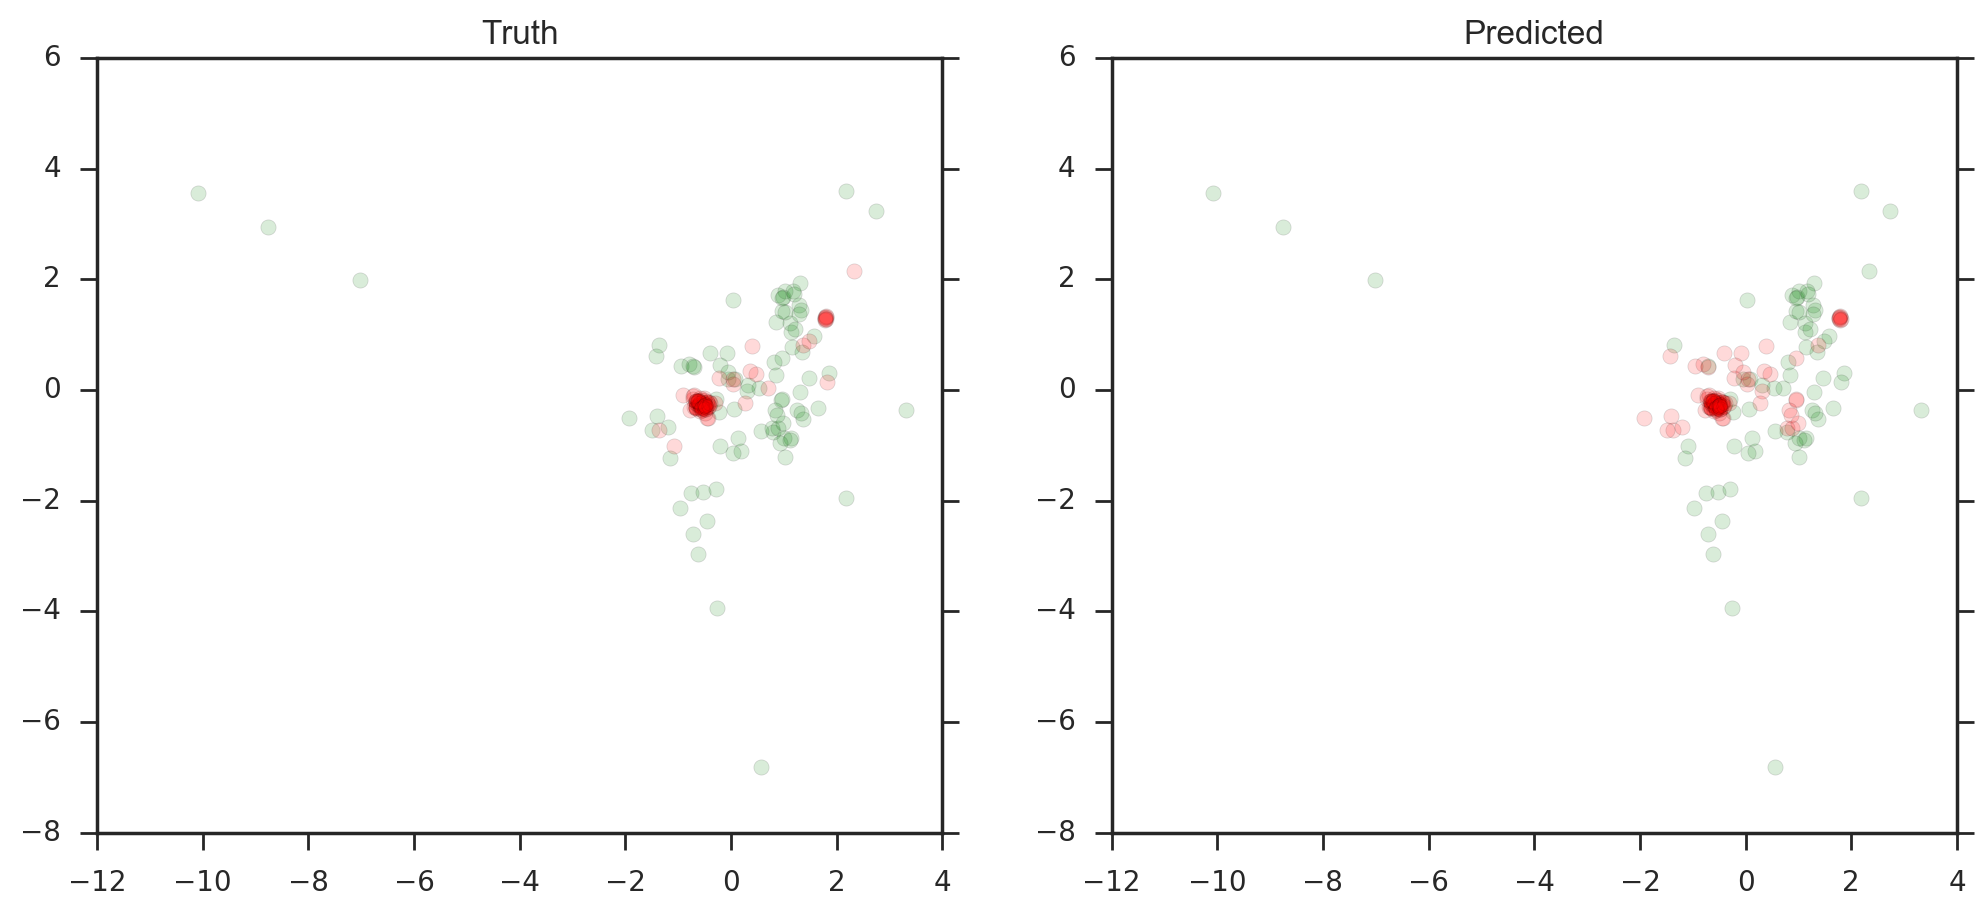

In [270]:
model_log = _fit_model(X, Y, LogisticRegression, verbose=True, 
                       fit_intercept=True, penalty='l2', n_jobs=-1, solver='newton-cg')
#model_lin = _fit_model(X, Y.astype(float), LinearRegression, verbose=True, n_jobs=-1)

# evaluate the model using cross-validation
scores = cross_val_score(LogisticRegression(), X_std, Y, scoring='accuracy', n_jobs=-1)
print (scores)
print (scores.mean())

plot_pca_classif(X, Y, model_log)

DUMMY PROB: 0.482; SCORE: 0.994; ROC_AUC_SCORE: 0.994; 
** COEFS:
          delta     n_ant     n_new   std_ant   std_new  step_ant  step_new
coefs  0.136036  0.192503  0.038099  0.135548  0.167418  0.122509  0.207887
** CONFUSION_MATRIX:
[[87  0]
 [ 1 80]]
** REPORT:
             precision    recall  f1-score   support

      False       0.99      1.00      0.99        87
       True       1.00      0.99      0.99        81

avg / total       0.99      0.99      0.99       168

[ 0.91071429  0.96428571  0.73214286]
0.869047619048


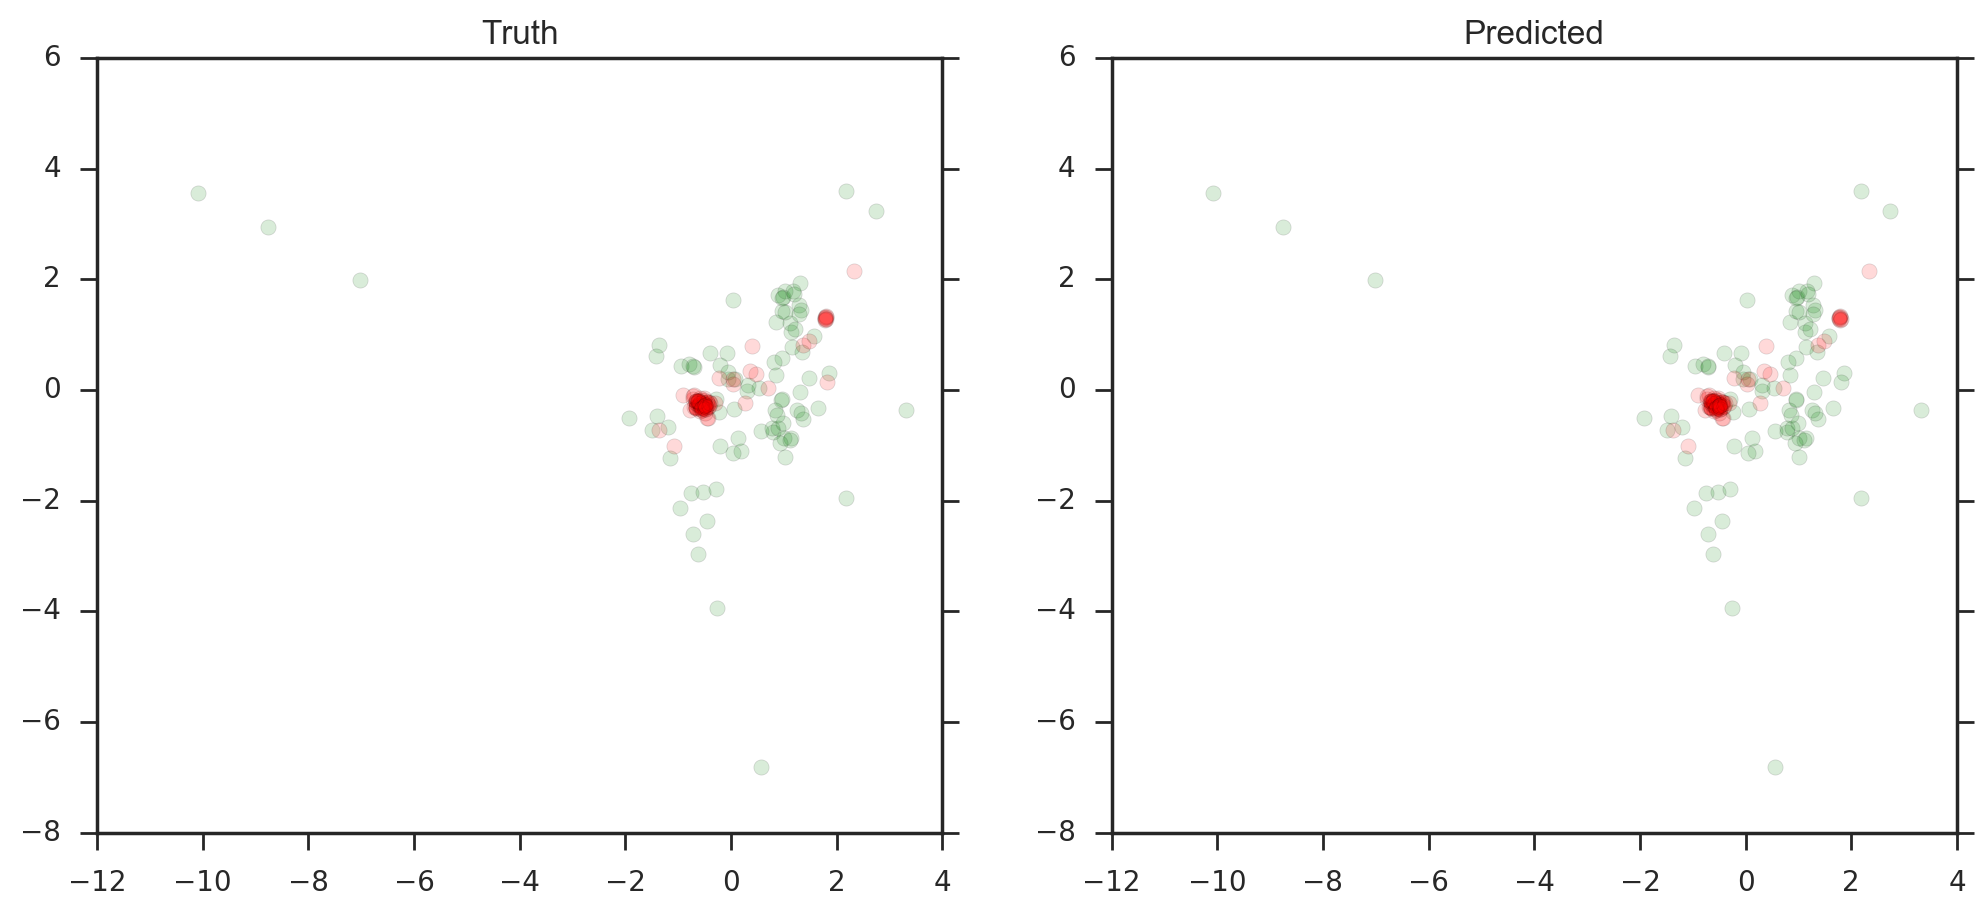

In [273]:
model_forest = _fit_model(X, Y, RandomForestClassifier, verbose=True, n_jobs=-1)

# evaluate the model using cross-validation
scores = cross_val_score(RandomForestClassifier(), X, Y, scoring='accuracy', n_jobs=-1)
print (scores)
print (scores.mean())

plot_pca_classif(X, Y, model_forest)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size=.3)
X_train.shape, y_test.shape

((117, 7), (51,))

In [274]:
import os
from tempfile import mkdtemp
from sklearn.externals import joblib


savedir = mkdtemp()
filename = os.path.join(savedir, 'forest.pkl')

joblib.dump(model_forest, filename) 
model_forest_load = joblib.load(filename)

DUMMY PROB: 0.482; SCORE: 0.982; ROC_AUC_SCORE: 0.981; 
** COEFS:
              0         1
coefs  0.547596  0.452404
** CONFUSION_MATRIX:
[[87  0]
 [ 3 78]]
** REPORT:
             precision    recall  f1-score   support

      False       0.97      1.00      0.98        87
       True       1.00      0.96      0.98        81

avg / total       0.98      0.98      0.98       168



(-8, 6)

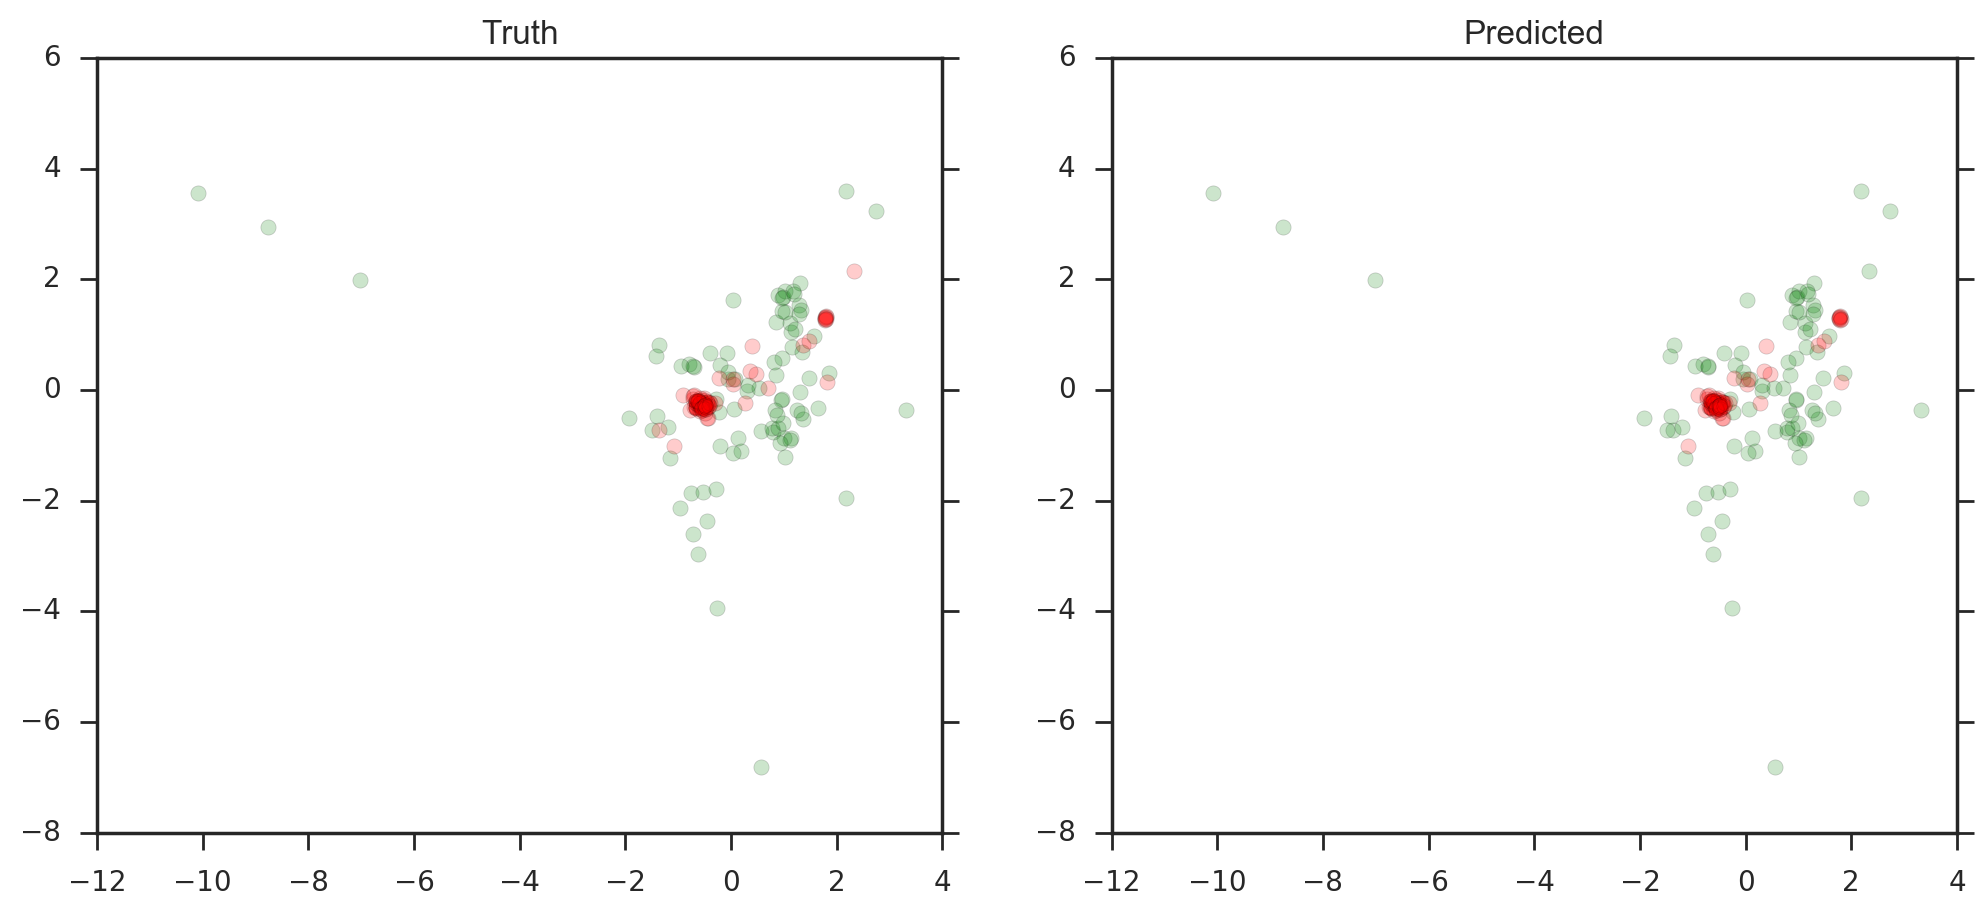

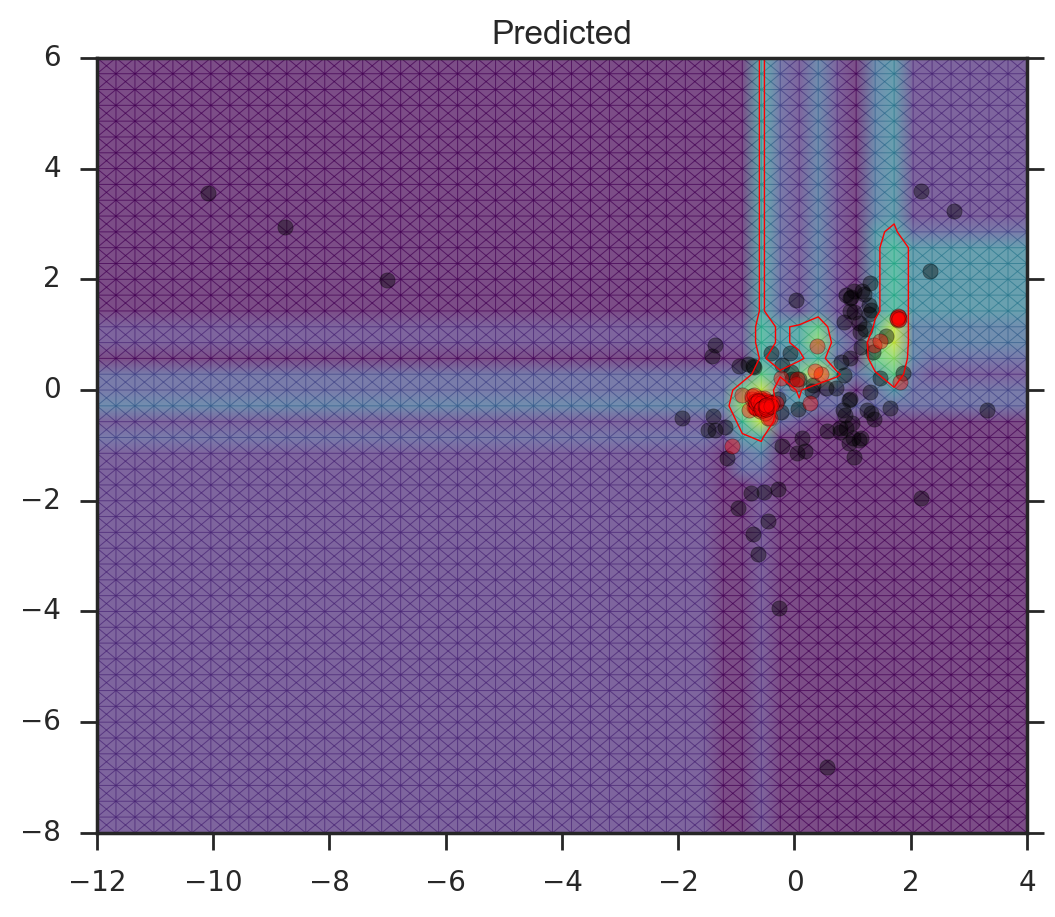

In [329]:

#X = X_std
model = model_forest_load
#def plot_pca_classif(X, Y, model):
pca = decomposition.PCA(n_components=2).fit_transform(X_std)
model_pca = _fit_model(pca, Y, RandomForestClassifier)
predicted = model_pca.predict(pca)

p_params = dict(alpha=.2, s=30, lw=.25)
plt.figure(figsize=(12, 5))
for i, (bool_is_bad, title) in enumerate(zip([Y.values, predicted], 
                                                ['Truth', 'Predicted'])):
    plt.subplot(121 + i)
    plt.scatter(pca[:,0][~bool_is_bad], pca[:,1][~bool_is_bad], c='g', **p_params)
    plt.scatter(pca[:,0][bool_is_bad], pca[:,1][bool_is_bad], c='r', **p_params)
    plt.title(title)
    plt.gca().xaxis.tick_bottom()


plt.figure(figsize=(6, 5))
plt.subplot(111)
plt.title('Predicted')
plt.gca().xaxis.tick_bottom()
    
# class 0 and 1 : areas
nx, ny = 50, 50
x_min, x_max = -12, 4
y_min, y_max = -8, 6
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))
Z = model_pca.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='viridis', alpha=.7, lw=0, shading='gouraud', edgecolors='None', norm=colors.Normalize(0., 1.))
               
plt.contour(xx, yy, Z, [0.45], linewidths=.5, colors='r')
p_params.update(alpha=.4)
plt.scatter(pca[:,0][~predicted], pca[:,1][~predicted], c='k', **p_params)
plt.scatter(pca[:,0][predicted], pca[:,1][predicted], c='r', **p_params)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

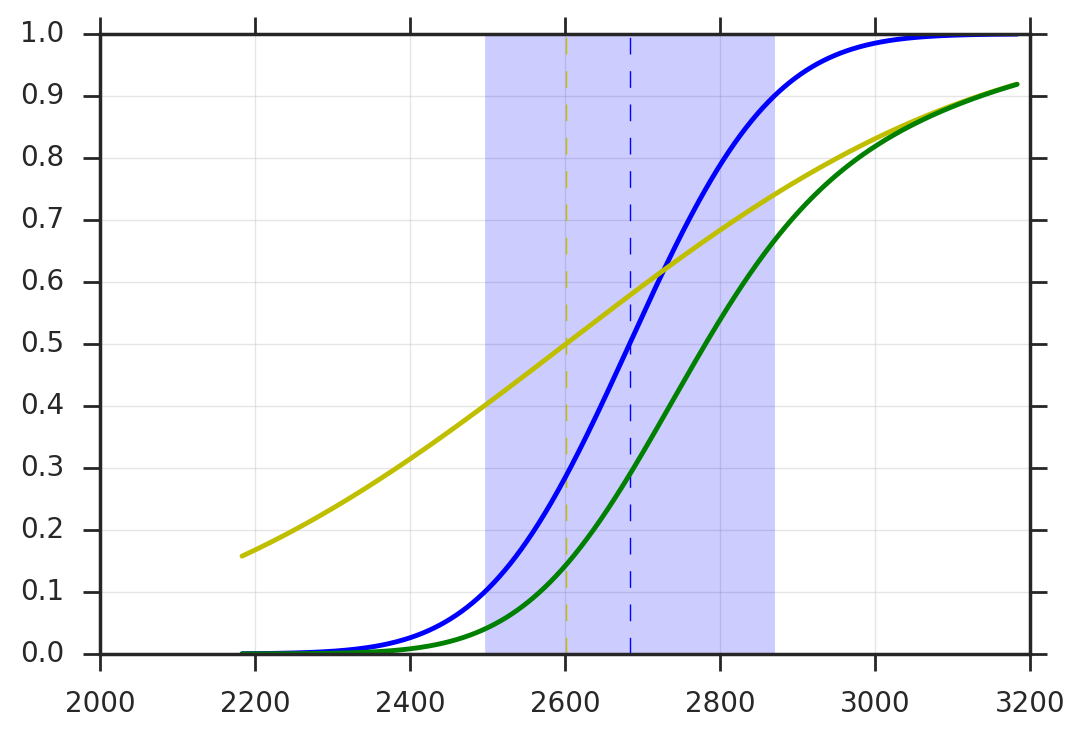

In [374]:
# 23:24:08_∆=-3.1 % => ANT=2683, s=145.8, L=8 --> NEW=2601, s=416.3, L=13

m, s, n = 2683, 145.8, 8
new_m, new_s, new_n = 2601, 416.3, 13

offset = 500

x = np.linspace(m - offset, m + offset, 2 * offset + 1)
norm_p = scipy.stats.norm.pdf(x, m, s)
norm_cdf = scipy.stats.norm.cdf(x, m, s)

plt.plot(x, norm_cdf, c='b')
plt.vlines([m], 0, 1, color='b', linestyle='--', lw=.5)
#plt.fill_between(x[norm_cdf > .1], [max(.1, min(.9, x)) for x in norm_cdf[norm_cdf > .1]], .1, 
#                 color='b', lw=0, alpha=.3)
plt.fill_betweenx(norm_cdf, x[abs(norm_cdf - .1) < .001][0], x[abs(norm_cdf - .9) < .001][0], 
                 color='b', lw=0, alpha=.2)
plt.plot(x, scipy.stats.norm.cdf(x, new_m, new_s), c='y')
plt.vlines([new_m], 0, 1, color='y', linestyle='--', lw=.5)
plt.plot(x, norm_cdf * scipy.stats.norm.cdf(x, new_m, new_s), c='g')
#plt.vlines([new_m], 0, 1, color='g', linestyle='--', lw=.5)
plt.yticks(np.arange(0, 1.1, .1))
plt.grid(lw=.5, alpha=.5)

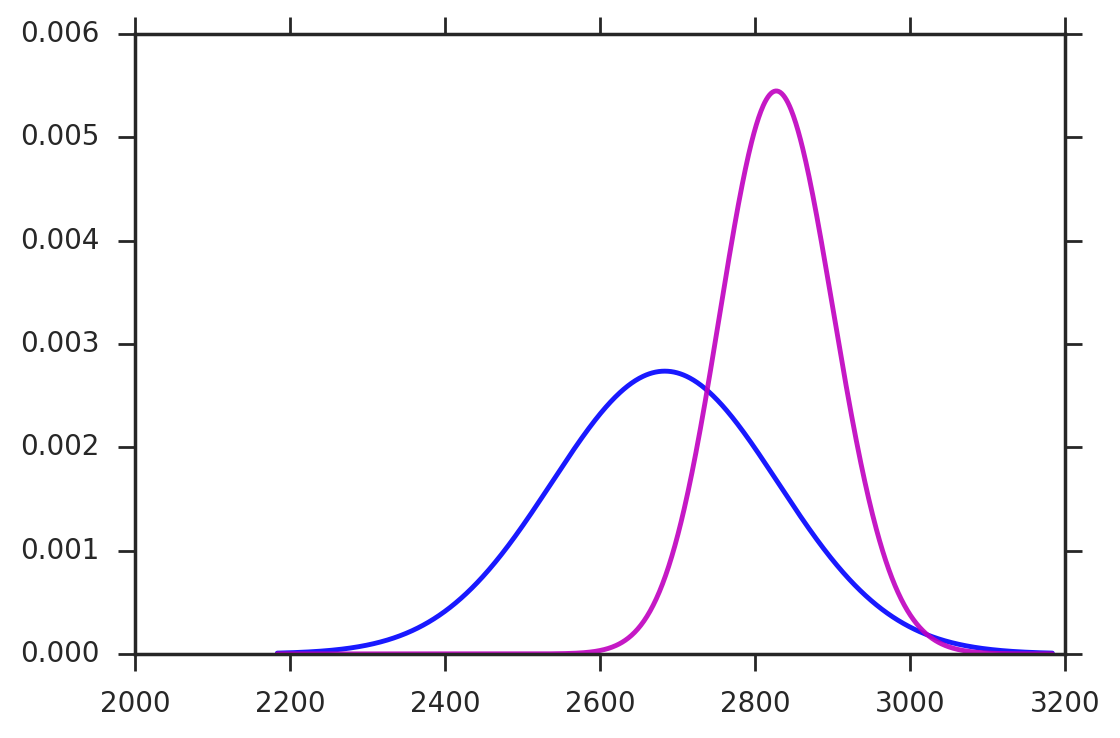

In [381]:
norm_p = scipy.stats.norm.pdf(x, m, s)
chi2_p = scipy.stats.chi2.pdf(x, m, s)

plt.plot(x, norm_p, c='b', alpha=.9)
plt.plot(x, chi2_p, c='m', alpha=.9)



In [379]:
scipy.stats.chi2?

In [386]:
raw_15 = '''01:56:01_∆=-32.9 % => ANT=337, s=4.2, L=548 --> NEW=226, s=13.0, L=6413
04:04:46_∆=-2.9 % => ANT=226, s=13.0, L=6413 --> NEW=220, s=13.6, L=7725
06:13:58_∆=-1.3 % => ANT=220, s=13.6, L=7725 --> NEW=217, s=12.6, L=7752
07:27:56_∆=2.3 % => ANT=217, s=12.6, L=7752 --> NEW=222, s=15.1, L=4438
07:28:04_∆=24.7 % => ANT=222, s=15.1, L=4438 --> NEW=277, s=114.0, L=8
07:29:44_∆=295.6 % => ANT=277, s=114.0, L=8 --> NEW=1095, s=15.1, L=100
07:33:37_∆=7.5 % => ANT=1095, s=15.1, L=100 --> NEW=1178, s=14.3, L=233
07:34:40_∆=-5.7 % => ANT=1178, s=14.3, L=233 --> NEW=1111, s=18.0, L=63
07:37:40_∆=6.0 % => ANT=1111, s=18.0, L=63 --> NEW=1177, s=15.1, L=180
07:38:45_∆=73.7 % => ANT=1177, s=15.1, L=180 --> NEW=2045, s=114.9, L=65
07:38:57_∆=0.9 % => ANT=2045, s=114.9, L=65 --> NEW=2064, s=3.2, L=12
07:39:54_∆=-1.8 % => ANT=2064, s=3.2, L=12 --> NEW=2026, s=7.9, L=57
07:40:02_∆=-8.5 % => ANT=2026, s=7.9, L=57 --> NEW=1853, s=346.5, L=8
08:20:33_∆=-88.0 % => ANT=1853, s=346.5, L=8 --> NEW=222, s=8.2, L=2431
08:20:42_∆=4.4 % => ANT=222, s=8.2, L=2431 --> NEW=232, s=4.9, L=9
08:38:04_∆=7.2 % => ANT=232, s=4.9, L=9 --> NEW=248, s=24.1, L=1042
08:38:12_∆=74.3 % => ANT=248, s=24.1, L=1042 --> NEW=433, s=293.4, L=8
08:39:26_∆=172.0 % => ANT=433, s=293.4, L=8 --> NEW=1178, s=16.1, L=74
08:39:52_∆=-76.5 % => ANT=1178, s=16.1, L=74 --> NEW=277, s=142.7, L=26
08:40:16_∆=463.3 % => ANT=277, s=142.7, L=26 --> NEW=1562, s=388.1, L=24
08:40:27_∆=-22.5 % => ANT=1562, s=388.1, L=24 --> NEW=1211, s=8.8, L=11
08:40:35_∆=30.2 % => ANT=1211, s=8.8, L=11 --> NEW=1576, s=469.6, L=8
08:40:43_∆=57.0 % => ANT=1576, s=469.6, L=8 --> NEW=2474, s=53.3, L=8
10:09:53_∆=-91.1 % => ANT=2474, s=53.3, L=8 --> NEW=220, s=25.1, L=5350
10:12:48_∆=27.9 % => ANT=220, s=25.1, L=5350 --> NEW=281, s=6.9, L=175
10:22:58_∆=27.8 % => ANT=281, s=6.9, L=175 --> NEW=359, s=8.7, L=610
10:31:03_∆=9.6 % => ANT=359, s=8.7, L=610 --> NEW=394, s=27.4, L=485
10:39:53_∆=15.2 % => ANT=394, s=27.4, L=485 --> NEW=453, s=22.4, L=530
10:44:17_∆=-0.8 % => ANT=453, s=22.4, L=530 --> NEW=450, s=18.6, L=264
11:34:44_∆=-27.5 % => ANT=450, s=18.6, L=264 --> NEW=326, s=65.2, L=3027
11:58:47_∆=2.9 % => ANT=326, s=65.2, L=3027 --> NEW=336, s=12.6, L=1443
13:56:07_∆=-16.0 % => ANT=336, s=12.6, L=1443 --> NEW=282, s=23.1, L=7040
13:57:14_∆=1136.7 % => ANT=282, s=23.1, L=7040 --> NEW=3486, s=465.3, L=67
13:58:20_∆=1.2 % => ANT=3486, s=465.3, L=67 --> NEW=3527, s=25.8, L=66
13:59:31_∆=0.2 % => ANT=3527, s=25.8, L=66 --> NEW=3535, s=23.1, L=71
14:01:46_∆=-0.2 % => ANT=3535, s=23.1, L=71 --> NEW=3527, s=18.7, L=135
14:03:00_∆=0.2 % => ANT=3527, s=18.7, L=135 --> NEW=3536, s=20.5, L=74
14:03:26_∆=-0.3 % => ANT=3536, s=20.5, L=74 --> NEW=3525, s=27.9, L=26
14:03:34_∆=-71.1 % => ANT=3525, s=27.9, L=26 --> NEW=1019, s=950.9, L=8
14:03:43_∆=32.9 % => ANT=1019, s=950.9, L=8 --> NEW=1353, s=9.1, L=9
14:04:31_∆=85.0 % => ANT=1353, s=9.1, L=9 --> NEW=2503, s=151.1, L=48
14:04:39_∆=2.8 % => ANT=2503, s=151.1, L=48 --> NEW=2573, s=117.5, L=8
14:04:52_∆=44.3 % => ANT=2573, s=117.5, L=8 --> NEW=3713, s=69.5, L=13
14:05:04_∆=-58.5 % => ANT=3713, s=69.5, L=13 --> NEW=1542, s=554.9, L=12
14:05:59_∆=61.8 % => ANT=1542, s=554.9, L=12 --> NEW=2495, s=137.7, L=55
14:06:12_∆=45.1 % => ANT=2495, s=137.7, L=55 --> NEW=3621, s=247.7, L=13
14:06:24_∆=-57.2 % => ANT=3621, s=247.7, L=13 --> NEW=1550, s=576.5, L=12
14:07:12_∆=60.3 % => ANT=1550, s=576.5, L=12 --> NEW=2484, s=158.1, L=48
14:07:20_∆=3.3 % => ANT=2484, s=158.1, L=48 --> NEW=2566, s=98.8, L=8
14:07:32_∆=44.8 % => ANT=2566, s=98.8, L=8 --> NEW=3716, s=86.4, L=12
14:07:55_∆=-61.8 % => ANT=3716, s=86.4, L=12 --> NEW=1418, s=395.0, L=23
14:08:03_∆=-0.7 % => ANT=1418, s=395.0, L=23 --> NEW=1408, s=267.7, L=8
14:08:27_∆=-77.5 % => ANT=1408, s=267.7, L=8 --> NEW=317, s=6.3, L=24
14:08:47_∆=350.3 % => ANT=317, s=6.3, L=24 --> NEW=1426, s=240.2, L=20
14:08:55_∆=51.7 % => ANT=1426, s=240.2, L=20 --> NEW=2164, s=539.6, L=8
14:09:03_∆=-35.9 % => ANT=2164, s=539.6, L=8 --> NEW=1388, s=7.7, L=8
14:09:57_∆=-76.3 % => ANT=1388, s=7.7, L=8 --> NEW=329, s=122.6, L=54
14:10:05_∆=7.3 % => ANT=329, s=122.6, L=54 --> NEW=353, s=106.7, L=8
14:10:14_∆=381.9 % => ANT=353, s=106.7, L=8 --> NEW=1702, s=369.3, L=9
14:10:26_∆=-18.6 % => ANT=1702, s=369.3, L=9 --> NEW=1385, s=17.7, L=12
14:11:15_∆=-75.8 % => ANT=1385, s=17.7, L=12 --> NEW=334, s=138.9, L=49
14:11:23_∆=0.8 % => ANT=334, s=138.9, L=49 --> NEW=337, s=72.6, L=8
14:11:31_∆=335.4 % => ANT=337, s=72.6, L=8 --> NEW=1467, s=133.0, L=8
14:11:50_∆=4.7 % => ANT=1467, s=133.0, L=8 --> NEW=1537, s=339.0, L=19
14:12:31_∆=-73.6 % => ANT=1537, s=339.0, L=19 --> NEW=406, s=103.1, L=41
14:12:40_∆=4.8 % => ANT=406, s=103.1, L=41 --> NEW=425, s=11.9, L=9
14:12:51_∆=269.3 % => ANT=425, s=11.9, L=9 --> NEW=1571, s=332.5, L=11
14:13:11_∆=12.3 % => ANT=1571, s=332.5, L=11 --> NEW=1764, s=381.2, L=20
14:14:01_∆=-69.8 % => ANT=1764, s=381.2, L=20 --> NEW=532, s=84.4, L=50
14:14:11_∆=208.2 % => ANT=532, s=84.4, L=50 --> NEW=1640, s=216.5, L=10
14:14:19_∆=23.9 % => ANT=1640, s=216.5, L=10 --> NEW=2032, s=479.4, L=8
14:14:34_∆=-21.7 % => ANT=2032, s=479.4, L=8 --> NEW=1591, s=12.0, L=15
14:15:17_∆=-66.4 % => ANT=1591, s=12.0, L=15 --> NEW=534, s=182.9, L=43
14:15:32_∆=199.5 % => ANT=534, s=182.9, L=43 --> NEW=1599, s=284.4, L=15
14:15:40_∆=31.8 % => ANT=1599, s=284.4, L=15 --> NEW=2108, s=554.5, L=8
14:15:54_∆=-25.5 % => ANT=2108, s=554.5, L=8 --> NEW=1571, s=5.2, L=14
14:16:36_∆=-65.1 % => ANT=1571, s=5.2, L=14 --> NEW=548, s=227.9, L=42
14:16:52_∆=160.8 % => ANT=548, s=227.9, L=42 --> NEW=1429, s=480.7, L=16
14:17:00_∆=45.9 % => ANT=1429, s=480.7, L=16 --> NEW=2084, s=547.0, L=8
14:17:17_∆=-24.8 % => ANT=2084, s=547.0, L=8 --> NEW=1568, s=8.4, L=17
14:17:51_∆=-67.3 % => ANT=1568, s=8.4, L=17 --> NEW=513, s=128.2, L=34
14:17:59_∆=0.6 % => ANT=513, s=128.2, L=34 --> NEW=516, s=70.0, L=8
14:18:12_∆=221.8 % => ANT=516, s=70.0, L=8 --> NEW=1661, s=107.3, L=13
14:18:20_∆=28.8 % => ANT=1661, s=107.3, L=13 --> NEW=2139, s=529.7, L=8
14:18:37_∆=-26.4 % => ANT=2139, s=529.7, L=8 --> NEW=1575, s=9.6, L=17
14:19:12_∆=-66.7 % => ANT=1575, s=9.6, L=17 --> NEW=525, s=162.9, L=35
14:19:20_∆=3.0 % => ANT=525, s=162.9, L=35 --> NEW=540, s=140.3, L=8
14:19:32_∆=209.5 % => ANT=540, s=140.3, L=8 --> NEW=1673, s=65.8, L=12
14:19:40_∆=28.1 % => ANT=1673, s=65.8, L=12 --> NEW=2143, s=536.6, L=8
14:19:59_∆=-26.9 % => ANT=2143, s=536.6, L=8 --> NEW=1567, s=11.0, L=19
14:20:37_∆=-66.2 % => ANT=1567, s=11.0, L=19 --> NEW=529, s=181.0, L=38
14:20:45_∆=191.1 % => ANT=529, s=181.0, L=38 --> NEW=1540, s=305.1, L=8
14:20:53_∆=10.4 % => ANT=1540, s=305.1, L=8 --> NEW=1700, s=13.5, L=8
14:21:01_∆=28.7 % => ANT=1700, s=13.5, L=8 --> NEW=2187, s=543.2, L=8
14:21:21_∆=-28.2 % => ANT=2187, s=543.2, L=8 --> NEW=1572, s=10.7, L=20
14:21:56_∆=-67.4 % => ANT=1572, s=10.7, L=20 --> NEW=512, s=128.2, L=35
14:22:14_∆=195.7 % => ANT=512, s=128.2, L=35 --> NEW=1515, s=415.5, L=18
14:22:22_∆=41.4 % => ANT=1515, s=415.5, L=18 --> NEW=2142, s=562.0, L=8
14:22:39_∆=-26.6 % => ANT=2142, s=562.0, L=8 --> NEW=1572, s=8.3, L=17
14:23:18_∆=-64.0 % => ANT=1572, s=8.3, L=17 --> NEW=565, s=255.9, L=39
14:23:34_∆=188.9 % => ANT=565, s=255.9, L=39 --> NEW=1633, s=192.7, L=16
14:23:42_∆=34.5 % => ANT=1633, s=192.7, L=16 --> NEW=2197, s=539.0, L=8
14:24:02_∆=-28.7 % => ANT=2197, s=539.0, L=8 --> NEW=1566, s=8.8, L=20
14:24:39_∆=-66.5 % => ANT=1566, s=8.8, L=20 --> NEW=524, s=176.9, L=37
14:24:48_∆=204.7 % => ANT=524, s=176.9, L=37 --> NEW=1598, s=215.1, L=9
14:24:56_∆=14.6 % => ANT=1598, s=215.1, L=9 --> NEW=1831, s=263.6, L=8
14:25:22_∆=-6.1 % => ANT=1831, s=263.6, L=8 --> NEW=1720, s=404.1, L=26
14:25:59_∆=-70.8 % => ANT=1720, s=404.1, L=26 --> NEW=502, s=113.5, L=37
14:26:15_∆=219.2 % => ANT=502, s=113.5, L=37 --> NEW=1602, s=259.1, L=16
14:26:23_∆=36.4 % => ANT=1602, s=259.1, L=16 --> NEW=2186, s=542.1, L=8
14:26:42_∆=-28.2 % => ANT=2186, s=542.1, L=8 --> NEW=1570, s=7.9, L=19
14:27:20_∆=-63.0 % => ANT=1570, s=7.9, L=19 --> NEW=581, s=275.9, L=38
14:27:35_∆=186.5 % => ANT=581, s=275.9, L=38 --> NEW=1664, s=95.5, L=15
14:27:43_∆=34.1 % => ANT=1664, s=95.5, L=15 --> NEW=2231, s=546.1, L=8
14:28:01_∆=-29.7 % => ANT=2231, s=546.1, L=8 --> NEW=1568, s=7.0, L=18
14:28:41_∆=-63.3 % => ANT=1568, s=7.0, L=18 --> NEW=576, s=287.1, L=40
14:28:56_∆=183.2 % => ANT=576, s=287.1, L=40 --> NEW=1630, s=183.2, L=15
14:29:04_∆=34.9 % => ANT=1630, s=183.2, L=15 --> NEW=2198, s=539.1, L=8
14:29:25_∆=-28.7 % => ANT=2198, s=539.1, L=8 --> NEW=1567, s=7.6, L=21
14:30:00_∆=-65.6 % => ANT=1567, s=7.6, L=21 --> NEW=540, s=189.6, L=35
14:30:16_∆=210.2 % => ANT=540, s=189.6, L=35 --> NEW=1674, s=183.5, L=16
14:30:24_∆=35.8 % => ANT=1674, s=183.5, L=16 --> NEW=2274, s=546.9, L=8
14:31:23_∆=-29.5 % => ANT=2274, s=546.9, L=8 --> NEW=1602, s=6.5, L=59
14:31:31_∆=-1.1 % => ANT=1602, s=6.5, L=59 --> NEW=1584, s=16.2, L=8
14:32:02_∆=1.3 % => ANT=1584, s=16.2, L=8 --> NEW=1605, s=292.8, L=31
14:32:10_∆=67.9 % => ANT=1605, s=292.8, L=31 --> NEW=2695, s=322.4, L=8
14:32:35_∆=-40.8 % => ANT=2695, s=322.4, L=8 --> NEW=1595, s=28.6, L=25
14:33:06_∆=-65.8 % => ANT=1595, s=28.6, L=25 --> NEW=545, s=178.1, L=31
14:33:24_∆=196.1 % => ANT=545, s=178.1, L=31 --> NEW=1613, s=284.6, L=18
14:33:32_∆=43.0 % => ANT=1613, s=284.6, L=18 --> NEW=2307, s=541.5, L=8
14:33:47_∆=-30.8 % => ANT=2307, s=541.5, L=8 --> NEW=1596, s=7.5, L=15
14:34:34_∆=-65.4 % => ANT=1596, s=7.5, L=15 --> NEW=552, s=203.3, L=47
14:34:46_∆=198.7 % => ANT=552, s=203.3, L=47 --> NEW=1648, s=168.9, L=12
14:34:54_∆=27.9 % => ANT=1648, s=168.9, L=12 --> NEW=2108, s=521.2, L=8
14:35:17_∆=-24.4 % => ANT=2108, s=521.2, L=8 --> NEW=1593, s=6.4, L=23
14:35:46_∆=-63.7 % => ANT=1593, s=6.4, L=23 --> NEW=578, s=241.8, L=29
14:36:05_∆=180.7 % => ANT=578, s=241.8, L=29 --> NEW=1623, s=243.4, L=19
14:36:13_∆=44.4 % => ANT=1623, s=243.4, L=19 --> NEW=2343, s=557.8, L=8
14:36:33_∆=-32.3 % => ANT=2343, s=557.8, L=8 --> NEW=1586, s=8.9, L=20
14:37:11_∆=-65.3 % => ANT=1586, s=8.9, L=20 --> NEW=550, s=199.3, L=38
14:37:26_∆=193.1 % => ANT=550, s=199.3, L=38 --> NEW=1613, s=221.7, L=15
14:37:34_∆=35.3 % => ANT=1613, s=221.7, L=15 --> NEW=2182, s=543.5, L=8
14:37:50_∆=-30.2 % => ANT=2182, s=543.5, L=8 --> NEW=1523, s=3.7, L=16
14:37:58_∆=-21.2 % => ANT=1523, s=3.7, L=16 --> NEW=1200, s=433.3, L=8
14:38:31_∆=-64.6 % => ANT=1200, s=433.3, L=8 --> NEW=425, s=11.1, L=33
14:38:46_∆=260.4 % => ANT=425, s=11.1, L=33 --> NEW=1531, s=227.0, L=15
14:38:54_∆=39.2 % => ANT=1531, s=227.0, L=15 --> NEW=2132, s=533.7, L=8
14:39:15_∆=-29.8 % => ANT=2132, s=533.7, L=8 --> NEW=1497, s=6.9, L=21
14:39:51_∆=-68.4 % => ANT=1497, s=6.9, L=21 --> NEW=473, s=222.9, L=36
14:40:07_∆=225.5 % => ANT=473, s=222.9, L=36 --> NEW=1541, s=221.2, L=16
14:40:15_∆=40.9 % => ANT=1541, s=221.2, L=16 --> NEW=2171, s=540.5, L=8
14:40:36_∆=-31.1 % => ANT=2171, s=540.5, L=8 --> NEW=1496, s=9.9, L=21
14:41:11_∆=-69.0 % => ANT=1496, s=9.9, L=21 --> NEW=463, s=203.2, L=35
14:41:28_∆=228.7 % => ANT=463, s=203.2, L=35 --> NEW=1522, s=264.1, L=17
14:41:36_∆=40.1 % => ANT=1522, s=264.1, L=17 --> NEW=2133, s=557.9, L=8
14:41:56_∆=-29.6 % => ANT=2133, s=557.9, L=8 --> NEW=1501, s=4.5, L=20
14:42:04_∆=-1.9 % => ANT=1501, s=4.5, L=20 --> NEW=1473, s=50.8, L=8
14:42:27_∆=-71.3 % => ANT=1473, s=50.8, L=8 --> NEW=423, s=97.9, L=23
14:42:47_∆=271.6 % => ANT=423, s=97.9, L=23 --> NEW=1570, s=165.6, L=20
14:42:55_∆=48.7 % => ANT=1570, s=165.6, L=20 --> NEW=2334, s=495.0, L=8
14:43:27_∆=-35.5 % => ANT=2334, s=495.0, L=8 --> NEW=1506, s=7.6, L=32
14:43:44_∆=-62.9 % => ANT=1506, s=7.6, L=32 --> NEW=559, s=309.9, L=17
14:44:07_∆=194.6 % => ANT=559, s=309.9, L=17 --> NEW=1646, s=134.5, L=23
14:44:15_∆=52.1 % => ANT=1646, s=134.5, L=23 --> NEW=2504, s=477.6, L=8
14:44:38_∆=-36.7 % => ANT=2504, s=477.6, L=8 --> NEW=1585, s=10.1, L=23
14:44:46_∆=-11.3 % => ANT=1585, s=10.1, L=23 --> NEW=1406, s=361.9, L=8
14:45:02_∆=-62.3 % => ANT=1406, s=361.9, L=8 --> NEW=529, s=8.4, L=16
14:45:10_∆=5.7 % => ANT=529, s=8.4, L=16 --> NEW=559, s=38.7, L=8
14:45:29_∆=206.2 % => ANT=559, s=38.7, L=8 --> NEW=1713, s=113.4, L=19
14:45:37_∆=39.7 % => ANT=1713, s=113.4, L=19 --> NEW=2392, s=544.1, L=8
14:45:59_∆=-32.1 % => ANT=2392, s=544.1, L=8 --> NEW=1625, s=10.5, L=22
14:46:33_∆=-63.7 % => ANT=1625, s=10.5, L=22 --> NEW=590, s=212.9, L=34
14:46:49_∆=187.1 % => ANT=590, s=212.9, L=34 --> NEW=1693, s=134.5, L=16
14:46:57_∆=35.3 % => ANT=1693, s=134.5, L=16 --> NEW=2291, s=547.1, L=8
14:47:18_∆=-29.5 % => ANT=2291, s=547.1, L=8 --> NEW=1616, s=11.9, L=21
14:49:16_∆=-68.8 % => ANT=1616, s=11.9, L=21 --> NEW=503, s=124.7, L=118
14:49:55_∆=5.4 % => ANT=503, s=124.7, L=118 --> NEW=531, s=16.6, L=39
15:37:29_∆=-27.0 % => ANT=531, s=16.6, L=39 --> NEW=388, s=36.0, L=2854
15:37:37_∆=22.0 % => ANT=388, s=36.0, L=2854 --> NEW=473, s=293.7, L=8
15:38:44_∆=157.7 % => ANT=473, s=293.7, L=8 --> NEW=1218, s=8.8, L=67
15:38:52_∆=-4.8 % => ANT=1218, s=8.8, L=67 --> NEW=1160, s=97.1, L=8
15:39:47_∆=-73.3 % => ANT=1160, s=97.1, L=8 --> NEW=310, s=19.8, L=55
15:39:55_∆=12.8 % => ANT=310, s=19.8, L=55 --> NEW=350, s=45.8, L=8
15:40:14_∆=257.3 % => ANT=350, s=45.8, L=8 --> NEW=1249, s=70.6, L=19
15:50:35_∆=-78.4 % => ANT=1249, s=70.6, L=19 --> NEW=270, s=63.6, L=621
16:01:29_∆=22.6 % => ANT=270, s=63.6, L=621 --> NEW=330, s=29.7, L=654
16:08:13_∆=15.0 % => ANT=330, s=29.7, L=654 --> NEW=380, s=18.1, L=404
17:49:01_∆=-26.6 % => ANT=380, s=18.1, L=404 --> NEW=279, s=18.6, L=6048
19:38:54_∆=-1.1 % => ANT=279, s=18.6, L=6048 --> NEW=276, s=18.6, L=6593
20:49:00_∆=-0.1 % => ANT=276, s=18.6, L=6593 --> NEW=276, s=18.6, L=4206
21:13:12_∆=22.4 % => ANT=276, s=18.6, L=4206 --> NEW=337, s=17.6, L=1452
21:30:26_∆=-2.9 % => ANT=337, s=17.6, L=1452 --> NEW=328, s=16.1, L=1034
22:16:05_∆=12.2 % => ANT=328, s=16.1, L=1034 --> NEW=368, s=15.8, L=2739
22:23:29_∆=16.9 % => ANT=368, s=15.8, L=2739 --> NEW=430, s=24.0, L=444
22:26:44_∆=280.1 % => ANT=430, s=24.0, L=444 --> NEW=1634, s=82.5, L=195
22:29:06_∆=-33.3 % => ANT=1634, s=82.5, L=195 --> NEW=1089, s=52.4, L=142
22:29:14_∆=10.6 % => ANT=1089, s=52.4, L=142 --> NEW=1204, s=135.6, L=8
22:29:55_∆=42.9 % => ANT=1204, s=135.6, L=8 --> NEW=1721, s=15.1, L=41
22:30:03_∆=-2.7 % => ANT=1721, s=15.1, L=41 --> NEW=1675, s=123.8, L=8
22:31:18_∆=-75.5 % => ANT=1675, s=123.8, L=8 --> NEW=410, s=37.2, L=75
22:31:26_∆=13.3 % => ANT=410, s=37.2, L=75 --> NEW=464, s=169.3, L=8
22:32:58_∆=152.4 % => ANT=464, s=169.3, L=8 --> NEW=1172, s=32.7, L=92
22:33:06_∆=-23.5 % => ANT=1172, s=32.7, L=92 --> NEW=897, s=300.2, L=8
22:57:46_∆=-59.1 % => ANT=897, s=300.2, L=8 --> NEW=367, s=11.2, L=1480'''

raw_16 = '''01:02:02_∆=-23.9 % => ANT=288, s=11.1, L=2677 --> NEW=219, s=6.0, L=1045
03:01:49_∆=3.6 % => ANT=219, s=6.0, L=1045 --> NEW=227, s=14.5, L=7187
05:04:22_∆=-8.5 % => ANT=227, s=14.5, L=7187 --> NEW=208, s=13.1, L=7353
05:33:12_∆=4.5 % => ANT=208, s=13.1, L=7353 --> NEW=217, s=16.9, L=1730
07:09:07_∆=-5.9 % => ANT=217, s=16.9, L=1730 --> NEW=204, s=9.0, L=5755
09:14:52_∆=6.0 % => ANT=204, s=9.0, L=5755 --> NEW=217, s=10.4, L=7545
09:33:21_∆=11.6 % => ANT=217, s=10.4, L=7545 --> NEW=242, s=22.5, L=1109
09:33:29_∆=25.5 % => ANT=242, s=22.5, L=1109 --> NEW=303, s=129.7, L=8
09:33:37_∆=297.3 % => ANT=303, s=129.7, L=8 --> NEW=1205, s=54.3, L=8
09:33:45_∆=8.9 % => ANT=1205, s=54.3, L=8 --> NEW=1312, s=192.1, L=8
09:34:36_∆=58.5 % => ANT=1312, s=192.1, L=8 --> NEW=2079, s=38.6, L=51
09:34:44_∆=-10.6 % => ANT=2079, s=38.6, L=51 --> NEW=1860, s=323.5, L=8
09:35:08_∆=-41.3 % => ANT=1860, s=323.5, L=8 --> NEW=1092, s=8.0, L=24
09:35:48_∆=117.4 % => ANT=1092, s=8.0, L=24 --> NEW=2373, s=308.2, L=40
09:36:18_∆=-53.2 % => ANT=2373, s=308.2, L=40 --> NEW=1110, s=123.6, L=30
09:36:27_∆=1.7 % => ANT=1110, s=123.6, L=30 --> NEW=1129, s=21.0, L=9
09:36:52_∆=78.7 % => ANT=1129, s=21.0, L=9 --> NEW=2017, s=176.8, L=25
09:37:00_∆=-58.5 % => ANT=2017, s=176.8, L=25 --> NEW=837, s=506.2, L=8
09:37:20_∆=-65.4 % => ANT=837, s=506.2, L=8 --> NEW=289, s=13.6, L=20
09:37:49_∆=314.7 % => ANT=289, s=13.6, L=20 --> NEW=1200, s=165.3, L=29
09:37:59_∆=-71.3 % => ANT=1200, s=165.3, L=29 --> NEW=345, s=200.1, L=10
09:38:07_∆=226.1 % => ANT=345, s=200.1, L=10 --> NEW=1124, s=186.2, L=8
09:38:22_∆=8.2 % => ANT=1124, s=186.2, L=8 --> NEW=1216, s=6.8, L=15
09:38:30_∆=-13.6 % => ANT=1216, s=6.8, L=15 --> NEW=1050, s=330.9, L=8
09:39:38_∆=-72.4 % => ANT=1050, s=330.9, L=8 --> NEW=290, s=8.9, L=68
09:39:46_∆=11.4 % => ANT=290, s=8.9, L=68 --> NEW=324, s=97.6, L=8
09:40:23_∆=400.8 % => ANT=324, s=97.6, L=8 --> NEW=1620, s=153.1, L=37
10:03:19_∆=-83.7 % => ANT=1620, s=153.1, L=37 --> NEW=264, s=37.7, L=1376
10:04:02_∆=20.7 % => ANT=264, s=37.7, L=1376 --> NEW=319, s=17.8, L=43
10:07:13_∆=-21.4 % => ANT=319, s=17.8, L=43 --> NEW=251, s=11.8, L=191
10:30:54_∆=-6.6 % => ANT=251, s=11.8, L=191 --> NEW=235, s=17.9, L=1421
10:31:27_∆=52.1 % => ANT=235, s=17.9, L=1421 --> NEW=357, s=23.1, L=33
11:02:44_∆=-1.6 % => ANT=357, s=23.1, L=33 --> NEW=351, s=18.9, L=1877
11:25:49_∆=24.7 % => ANT=351, s=18.9, L=1877 --> NEW=438, s=39.4, L=1385
11:28:49_∆=2.3 % => ANT=438, s=39.4, L=1385 --> NEW=448, s=36.6, L=180
11:31:14_∆=384.5 % => ANT=448, s=36.6, L=180 --> NEW=2170, s=189.6, L=145
11:40:31_∆=0.6 % => ANT=2170, s=189.6, L=145 --> NEW=2182, s=8.0, L=557
11:40:39_∆=-0.6 % => ANT=2182, s=8.0, L=557 --> NEW=2169, s=54.0, L=8
11:45:31_∆=-77.8 % => ANT=2169, s=54.0, L=8 --> NEW=481, s=55.3, L=292
11:47:14_∆=-11.4 % => ANT=481, s=55.3, L=292 --> NEW=426, s=25.9, L=103
11:47:22_∆=35.7 % => ANT=426, s=25.9, L=103 --> NEW=578, s=268.2, L=8
11:58:23_∆=274.5 % => ANT=578, s=268.2, L=8 --> NEW=2165, s=11.0, L=661
11:59:07_∆=-2.7 % => ANT=2165, s=11.0, L=661 --> NEW=2106, s=27.4, L=44
11:59:15_∆=-17.6 % => ANT=2106, s=27.4, L=44 --> NEW=1735, s=586.6, L=8
12:25:48_∆=-76.4 % => ANT=1735, s=586.6, L=8 --> NEW=410, s=22.6, L=1593
12:25:56_∆=13.6 % => ANT=410, s=22.6, L=1593 --> NEW=466, s=104.0, L=8
12:26:21_∆=180.6 % => ANT=466, s=104.0, L=8 --> NEW=1307, s=34.8, L=25
12:26:29_∆=5.0 % => ANT=1307, s=34.8, L=25 --> NEW=1373, s=102.7, L=8
12:26:57_∆=57.8 % => ANT=1373, s=102.7, L=8 --> NEW=2166, s=99.4, L=28
12:28:42_∆=-44.4 % => ANT=2166, s=99.4, L=28 --> NEW=1205, s=98.9, L=105
12:28:52_∆=79.4 % => ANT=1205, s=98.9, L=105 --> NEW=2162, s=512.4, L=10
12:29:07_∆=56.6 % => ANT=2162, s=512.4, L=10 --> NEW=3386, s=193.4, L=15
12:29:15_∆=-42.8 % => ANT=3386, s=193.4, L=15 --> NEW=1936, s=605.0, L=8
12:29:43_∆=-38.6 % => ANT=1936, s=605.0, L=8 --> NEW=1188, s=7.1, L=28
12:44:39_∆=-71.2 % => ANT=1188, s=7.1, L=28 --> NEW=342, s=52.3, L=896
12:45:44_∆=-4.3 % => ANT=342, s=52.3, L=896 --> NEW=327, s=76.6, L=65
12:53:41_∆=36.1 % => ANT=327, s=76.6, L=65 --> NEW=445, s=25.0, L=477
12:53:49_∆=111.8 % => ANT=445, s=25.0, L=477 --> NEW=944, s=676.3, L=8
13:08:00_∆=131.5 % => ANT=944, s=676.3, L=8 --> NEW=2184, s=9.7, L=851
13:08:08_∆=-45.3 % => ANT=2184, s=9.7, L=851 --> NEW=1195, s=788.9, L=8
13:15:12_∆=-68.8 % => ANT=1195, s=788.9, L=8 --> NEW=372, s=37.0, L=424
13:46:03_∆=-6.3 % => ANT=372, s=37.0, L=424 --> NEW=349, s=51.1, L=1851
14:08:59_∆=-6.0 % => ANT=349, s=51.1, L=1851 --> NEW=328, s=32.7, L=1376
14:16:25_∆=11.8 % => ANT=328, s=32.7, L=1376 --> NEW=367, s=8.1, L=446
14:20:37_∆=-14.0 % => ANT=367, s=8.1, L=446 --> NEW=315, s=17.6, L=252
14:26:04_∆=22.2 % => ANT=315, s=17.6, L=252 --> NEW=385, s=18.4, L=327
14:30:02_∆=-22.3 % => ANT=385, s=18.4, L=327 --> NEW=299, s=29.1, L=238
14:39:54_∆=14.4 % => ANT=299, s=29.1, L=238 --> NEW=342, s=44.0, L=592
14:40:02_∆=5.3 % => ANT=342, s=44.0, L=592 --> NEW=360, s=139.6, L=8
14:40:11_∆=300.3 % => ANT=360, s=139.6, L=8 --> NEW=1443, s=71.7, L=9
14:40:19_∆=5.6 % => ANT=1443, s=71.7, L=9 --> NEW=1523, s=63.6, L=8
14:41:17_∆=16.7 % => ANT=1523, s=63.6, L=8 --> NEW=1777, s=7.1, L=58
14:42:54_∆=-0.7 % => ANT=1777, s=7.1, L=58 --> NEW=1765, s=43.1, L=97
14:43:02_∆=-3.4 % => ANT=1765, s=43.1, L=97 --> NEW=1705, s=139.4, L=8
14:43:10_∆=-36.9 % => ANT=1705, s=139.4, L=8 --> NEW=1076, s=483.0, L=8
14:43:45_∆=65.0 % => ANT=1076, s=483.0, L=8 --> NEW=1775, s=6.5, L=35
14:43:53_∆=-2.9 % => ANT=1775, s=6.5, L=35 --> NEW=1724, s=112.9, L=8
14:44:01_∆=-57.3 % => ANT=1724, s=112.9, L=8 --> NEW=736, s=430.6, L=8
14:44:10_∆=44.2 % => ANT=736, s=430.6, L=8 --> NEW=1062, s=570.4, L=9
14:44:18_∆=42.6 % => ANT=1062, s=570.4, L=9 --> NEW=1514, s=418.7, L=8
14:44:33_∆=10.4 % => ANT=1514, s=418.7, L=8 --> NEW=1672, s=292.6, L=15
14:44:48_∆=-5.6 % => ANT=1672, s=292.6, L=15 --> NEW=1577, s=343.7, L=15
14:44:56_∆=-45.4 % => ANT=1577, s=343.7, L=15 --> NEW=862, s=544.5, L=8
14:45:13_∆=81.4 % => ANT=862, s=544.5, L=8 --> NEW=1563, s=154.5, L=17
14:45:21_∆=-39.4 % => ANT=1563, s=154.5, L=17 --> NEW=948, s=405.3, L=8
14:45:58_∆=83.8 % => ANT=948, s=405.3, L=8 --> NEW=1742, s=69.1, L=37
14:46:06_∆=-47.3 % => ANT=1742, s=69.1, L=37 --> NEW=918, s=535.0, L=8
14:46:16_∆=92.9 % => ANT=918, s=535.0, L=8 --> NEW=1771, s=5.6, L=10
14:46:33_∆=-25.5 % => ANT=1771, s=5.6, L=10 --> NEW=1319, s=221.2, L=17
14:46:41_∆=-48.2 % => ANT=1319, s=221.2, L=17 --> NEW=683, s=397.9, L=8
14:47:07_∆=111.4 % => ANT=683, s=397.9, L=8 --> NEW=1444, s=13.8, L=26
14:47:21_∆=-54.1 % => ANT=1444, s=13.8, L=26 --> NEW=663, s=387.6, L=14
14:48:37_∆=165.7 % => ANT=663, s=387.6, L=14 --> NEW=1761, s=83.9, L=76
14:50:27_∆=-82.5 % => ANT=1761, s=83.9, L=76 --> NEW=308, s=99.2, L=110
14:50:35_∆=25.5 % => ANT=308, s=99.2, L=110 --> NEW=387, s=210.9, L=8
14:50:44_∆=347.2 % => ANT=387, s=210.9, L=8 --> NEW=1730, s=82.9, L=9
15:02:20_∆=-82.3 % => ANT=1730, s=82.9, L=9 --> NEW=305, s=66.7, L=696
15:02:34_∆=9.5 % => ANT=305, s=66.7, L=696 --> NEW=334, s=7.5, L=14
15:05:18_∆=20.4 % => ANT=334, s=7.5, L=14 --> NEW=403, s=11.5, L=164
15:06:52_∆=415.5 % => ANT=403, s=11.5, L=164 --> NEW=2075, s=209.3, L=94
15:08:46_∆=-33.8 % => ANT=2075, s=209.3, L=94 --> NEW=1373, s=38.1, L=114
15:09:32_∆=0.6 % => ANT=1373, s=38.1, L=114 --> NEW=1382, s=12.5, L=46
15:10:13_∆=-4.2 % => ANT=1382, s=12.5, L=46 --> NEW=1324, s=28.4, L=41
15:10:21_∆=13.3 % => ANT=1324, s=28.4, L=41 --> NEW=1500, s=377.7, L=8
15:12:22_∆=67.8 % => ANT=1500, s=377.7, L=8 --> NEW=2517, s=39.3, L=121
15:13:16_∆=-2.0 % => ANT=2517, s=39.3, L=121 --> NEW=2467, s=72.2, L=54
15:13:40_∆=7.0 % => ANT=2467, s=72.2, L=54 --> NEW=2639, s=79.4, L=24
15:13:49_∆=40.6 % => ANT=2639, s=79.4, L=24 --> NEW=3710, s=328.8, L=9
15:14:09_∆=-29.5 % => ANT=3710, s=328.8, L=9 --> NEW=2618, s=268.6, L=20
15:14:20_∆=34.7 % => ANT=2618, s=268.6, L=20 --> NEW=3527, s=402.9, L=11
15:14:54_∆=-27.1 % => ANT=3527, s=402.9, L=11 --> NEW=2571, s=46.0, L=34
15:15:05_∆=40.4 % => ANT=2571, s=46.0, L=34 --> NEW=3610, s=456.4, L=11
15:15:24_∆=-26.1 % => ANT=3610, s=456.4, L=11 --> NEW=2669, s=145.7, L=19
15:15:36_∆=35.3 % => ANT=2669, s=145.7, L=19 --> NEW=3611, s=405.5, L=12
15:15:44_∆=-47.0 % => ANT=3611, s=405.5, L=12 --> NEW=1913, s=337.7, L=8
15:15:54_∆=-65.0 % => ANT=1913, s=337.7, L=8 --> NEW=669, s=241.9, L=10
15:16:02_∆=26.5 % => ANT=669, s=241.9, L=10 --> NEW=846, s=356.3, L=8
15:27:04_∆=-55.8 % => ANT=846, s=356.3, L=8 --> NEW=374, s=18.7, L=662
15:48:47_∆=-12.0 % => ANT=374, s=18.7, L=662 --> NEW=330, s=19.8, L=1303
15:48:55_∆=7.2 % => ANT=330, s=19.8, L=1303 --> NEW=353, s=74.8, L=8
15:50:02_∆=246.5 % => ANT=353, s=74.8, L=8 --> NEW=1224, s=31.0, L=67
15:50:57_∆=-72.2 % => ANT=1224, s=31.0, L=67 --> NEW=340, s=116.0, L=55
15:51:12_∆=26.2 % => ANT=340, s=116.0, L=55 --> NEW=429, s=169.5, L=15
15:51:43_∆=189.2 % => ANT=429, s=169.5, L=15 --> NEW=1241, s=44.4, L=31
16:12:08_∆=-73.9 % => ANT=1241, s=44.4, L=31 --> NEW=324, s=29.2, L=1225
16:29:13_∆=13.3 % => ANT=324, s=29.2, L=1225 --> NEW=367, s=20.8, L=1025
16:35:04_∆=1.5 % => ANT=367, s=20.8, L=1025 --> NEW=373, s=17.4, L=351
17:05:09_∆=-27.2 % => ANT=373, s=17.4, L=351 --> NEW=271, s=14.4, L=1805
17:47:03_∆=43.1 % => ANT=271, s=14.4, L=1805 --> NEW=388, s=28.9, L=2514
17:56:12_∆=6.9 % => ANT=388, s=28.9, L=2514 --> NEW=415, s=10.4, L=549
18:03:39_∆=9.3 % => ANT=415, s=10.4, L=549 --> NEW=454, s=25.0, L=447
18:03:47_∆=9.1 % => ANT=454, s=25.0, L=447 --> NEW=495, s=82.0, L=8
18:04:05_∆=155.7 % => ANT=495, s=82.0, L=8 --> NEW=1266, s=31.8, L=18
18:04:13_∆=-11.9 % => ANT=1266, s=31.8, L=18 --> NEW=1115, s=310.8, L=8
18:05:50_∆=-58.0 % => ANT=1115, s=310.8, L=8 --> NEW=469, s=7.7, L=97
18:06:40_∆=12.2 % => ANT=469, s=7.7, L=97 --> NEW=526, s=135.7, L=50
18:38:16_∆=-22.6 % => ANT=526, s=135.7, L=50 --> NEW=407, s=42.5, L=1896
18:38:43_∆=170.1 % => ANT=407, s=42.5, L=1896 --> NEW=1100, s=292.8, L=27
18:40:26_∆=-59.5 % => ANT=1100, s=292.8, L=27 --> NEW=445, s=20.5, L=103
18:40:34_∆=17.5 % => ANT=445, s=20.5, L=103 --> NEW=523, s=144.7, L=8
18:41:28_∆=-13.4 % => ANT=523, s=144.7, L=8 --> NEW=452, s=132.8, L=54
18:47:26_∆=-9.1 % => ANT=452, s=132.8, L=54 --> NEW=411, s=51.6, L=358
19:08:52_∆=-10.5 % => ANT=411, s=51.6, L=358 --> NEW=368, s=37.9, L=1286
19:37:45_∆=6.0 % => ANT=368, s=37.9, L=1286 --> NEW=390, s=25.1, L=1733
19:50:11_∆=-16.8 % => ANT=390, s=25.1, L=1733 --> NEW=325, s=42.2, L=746
21:01:33_∆=-14.2 % => ANT=325, s=42.2, L=746 --> NEW=278, s=20.6, L=4282
21:24:28_∆=17.3 % => ANT=278, s=20.6, L=4282 --> NEW=327, s=7.7, L=1375
21:32:42_∆=15.1 % => ANT=327, s=7.7, L=1375 --> NEW=376, s=29.2, L=494
21:36:01_∆=17.5 % => ANT=376, s=29.2, L=494 --> NEW=441, s=13.4, L=199
21:37:42_∆=-14.5 % => ANT=441, s=13.4, L=199 --> NEW=377, s=7.1, L=101
21:39:48_∆=15.0 % => ANT=377, s=7.1, L=101 --> NEW=434, s=10.9, L=126
21:57:02_∆=-15.5 % => ANT=434, s=10.9, L=126 --> NEW=367, s=25.6, L=1034
22:08:36_∆=-38.5 % => ANT=367, s=25.6, L=1034 --> NEW=226, s=8.9, L=694
22:10:01_∆=23.2 % => ANT=226, s=8.9, L=694 --> NEW=278, s=18.1, L=85
22:10:35_∆=15.5 % => ANT=278, s=18.1, L=85 --> NEW=321, s=8.3, L=34
22:48:45_∆=-32.4 % => ANT=321, s=8.3, L=34 --> NEW=217, s=5.2, L=2290
23:10:10_∆=31.8 % => ANT=217, s=5.2, L=2290 --> NEW=286, s=7.8, L=1285
23:14:14_∆=-24.0 % => ANT=286, s=7.8, L=1285 --> NEW=218, s=5.8, L=244
'''

raw_17 = '''00:43:16_∆=39.9 % => ANT=220, s=5.3, L=2021 --> NEW=308, s=29.6, L=575
00:53:41_∆=-16.1 % => ANT=308, s=29.6, L=575 --> NEW=259, s=19.0, L=625
00:53:49_∆=31.5 % => ANT=259, s=19.0, L=625 --> NEW=340, s=178.9, L=8
01:01:36_∆=-19.4 % => ANT=340, s=178.9, L=8 --> NEW=274, s=22.8, L=467
02:41:24_∆=-16.5 % => ANT=274, s=22.8, L=467 --> NEW=229, s=12.1, L=5988
02:41:32_∆=34.6 % => ANT=229, s=12.1, L=5988 --> NEW=309, s=178.6, L=8
04:33:43_∆=-31.5 % => ANT=309, s=178.6, L=8 --> NEW=211, s=15.5, L=6731
06:20:33_∆=-1.6 % => ANT=211, s=15.5, L=6731 --> NEW=208, s=12.1, L=6410
08:23:42_∆=1.3 % => ANT=208, s=12.1, L=6410 --> NEW=211, s=12.6, L=7389
10:26:23_∆=8.8 % => ANT=211, s=12.6, L=7389 --> NEW=229, s=12.7, L=7361
10:49:47_∆=8.0 % => ANT=229, s=12.7, L=7361 --> NEW=247, s=20.8, L=1404
10:50:16_∆=345.4 % => ANT=247, s=20.8, L=1404 --> NEW=1102, s=283.7, L=29
10:50:33_∆=154.8 % => ANT=1102, s=283.7, L=29 --> NEW=2808, s=209.0, L=17
10:51:00_∆=-25.6 % => ANT=2808, s=209.0, L=17 --> NEW=2090, s=146.3, L=27
10:51:08_∆=-5.1 % => ANT=2090, s=146.3, L=27 --> NEW=1983, s=134.2, L=8
10:51:30_∆=-45.2 % => ANT=1983, s=134.2, L=8 --> NEW=1086, s=18.8, L=22
10:51:57_∆=112.7 % => ANT=1086, s=18.8, L=22 --> NEW=2311, s=312.8, L=27
10:52:15_∆=-51.7 % => ANT=2311, s=312.8, L=27 --> NEW=1115, s=138.9, L=18
10:52:23_∆=6.2 % => ANT=1115, s=138.9, L=18 --> NEW=1184, s=129.5, L=8
10:53:00_∆=74.1 % => ANT=1184, s=129.5, L=8 --> NEW=2061, s=30.7, L=37
10:53:32_∆=-45.8 % => ANT=2061, s=30.7, L=37 --> NEW=1117, s=179.2, L=32
10:53:42_∆=-71.6 % => ANT=1117, s=179.2, L=32 --> NEW=317, s=157.5, L=10
10:54:24_∆=392.4 % => ANT=317, s=157.5, L=10 --> NEW=1561, s=276.8, L=42
11:09:44_∆=-84.3 % => ANT=1561, s=276.8, L=42 --> NEW=244, s=18.0, L=920
12:01:51_∆=-17.7 % => ANT=244, s=18.0, L=920 --> NEW=201, s=16.9, L=3127
12:08:04_∆=36.7 % => ANT=201, s=16.9, L=3127 --> NEW=275, s=39.3, L=373
13:58:56_∆=-15.3 % => ANT=275, s=39.3, L=373 --> NEW=233, s=21.0, L=6652
14:27:41_∆=16.2 % => ANT=233, s=21.0, L=6652 --> NEW=271, s=19.8, L=1725
14:28:01_∆=12.0 % => ANT=271, s=19.8, L=1725 --> NEW=303, s=9.1, L=20
14:51:34_∆=9.5 % => ANT=303, s=9.1, L=20 --> NEW=332, s=26.6, L=1413
14:53:00_∆=381.3 % => ANT=332, s=26.6, L=1413 --> NEW=1597, s=146.2, L=86
14:53:08_∆=-15.3 % => ANT=1597, s=146.2, L=86 --> NEW=1352, s=321.7, L=8
14:57:10_∆=-40.6 % => ANT=1352, s=321.7, L=8 --> NEW=804, s=19.1, L=242
14:57:18_∆=-2.0 % => ANT=804, s=19.1, L=242 --> NEW=787, s=15.9, L=8
15:25:18_∆=-62.2 % => ANT=787, s=15.9, L=8 --> NEW=298, s=12.2, L=1680
15:25:26_∆=34.1 % => ANT=298, s=12.2, L=1680 --> NEW=400, s=245.7, L=8
15:25:47_∆=299.7 % => ANT=400, s=245.7, L=8 --> NEW=1597, s=192.9, L=21
15:28:13_∆=-80.5 % => ANT=1597, s=192.9, L=21 --> NEW=311, s=89.7, L=146
15:36:31_∆=19.3 % => ANT=311, s=89.7, L=146 --> NEW=371, s=32.2, L=498
15:36:39_∆=53.1 % => ANT=371, s=32.2, L=498 --> NEW=568, s=319.1, L=8
15:37:39_∆=133.6 % => ANT=568, s=319.1, L=8 --> NEW=1327, s=10.9, L=60
15:37:48_∆=-1.5 % => ANT=1327, s=10.9, L=60 --> NEW=1308, s=6.2, L=9
15:38:16_∆=-60.3 % => ANT=1308, s=6.2, L=9 --> NEW=519, s=104.5, L=28
15:38:30_∆=157.8 % => ANT=519, s=104.5, L=28 --> NEW=1338, s=237.1, L=14
15:39:09_∆=-68.1 % => ANT=1338, s=237.1, L=14 --> NEW=427, s=171.1, L=39
15:39:21_∆=-14.0 % => ANT=427, s=171.1, L=39 --> NEW=367, s=4.1, L=12
15:39:29_∆=-6.4 % => ANT=367, s=4.1, L=12 --> NEW=344, s=4.4, L=8
15:42:47_∆=21.1 % => ANT=344, s=4.4, L=8 --> NEW=416, s=11.8, L=198
15:43:20_∆=-14.4 % => ANT=416, s=11.8, L=198 --> NEW=357, s=15.5, L=33
15:44:41_∆=15.4 % => ANT=357, s=15.5, L=33 --> NEW=411, s=15.9, L=81
16:31:31_∆=-15.9 % => ANT=411, s=15.9, L=81 --> NEW=346, s=10.2, L=2810
16:40:10_∆=-5.1 % => ANT=346, s=10.2, L=2810 --> NEW=328, s=6.2, L=519
17:32:34_∆=-25.2 % => ANT=328, s=6.2, L=519 --> NEW=246, s=10.1, L=3144
18:33:39_∆=8.4 % => ANT=246, s=10.1, L=3144 --> NEW=266, s=16.0, L=3665
19:27:00_∆=-9.0 % => ANT=266, s=16.0, L=3665 --> NEW=242, s=6.9, L=3201
19:45:03_∆=11.7 % => ANT=242, s=6.9, L=3201 --> NEW=271, s=23.4, L=1083
19:47:00_∆=29.5 % => ANT=271, s=23.4, L=1083 --> NEW=351, s=12.4, L=117
19:53:16_∆=376.8 % => ANT=351, s=12.4, L=117 --> NEW=1672, s=75.3, L=376
19:53:28_∆=-68.3 % => ANT=1672, s=75.3, L=376 --> NEW=529, s=364.1, L=12
19:54:09_∆=214.9 % => ANT=529, s=364.1, L=12 --> NEW=1667, s=58.7, L=41
19:54:20_∆=0.1 % => ANT=1667, s=58.7, L=41 --> NEW=1669, s=4.7, L=11
19:54:44_∆=-69.0 % => ANT=1669, s=4.7, L=11 --> NEW=518, s=373.1, L=24
19:57:32_∆=222.2 % => ANT=518, s=373.1, L=24 --> NEW=1670, s=32.7, L=168
19:57:40_∆=-1.7 % => ANT=1670, s=32.7, L=168 --> NEW=1641, s=37.2, L=8
19:57:55_∆=-74.9 % => ANT=1641, s=37.2, L=8 --> NEW=412, s=172.8, L=15
19:58:11_∆=298.9 % => ANT=412, s=172.8, L=15 --> NEW=1643, s=251.1, L=16
19:58:29_∆=-73.6 % => ANT=1643, s=251.1, L=16 --> NEW=433, s=231.6, L=18
20:00:32_∆=282.5 % => ANT=433, s=231.6, L=18 --> NEW=1658, s=121.0, L=123
20:02:19_∆=1.1 % => ANT=1658, s=121.0, L=123 --> NEW=1676, s=11.8, L=107
20:02:33_∆=-1.3 % => ANT=1676, s=11.8, L=107 --> NEW=1654, s=6.2, L=14
20:03:40_∆=0.8 % => ANT=1654, s=6.2, L=14 --> NEW=1668, s=7.2, L=67
20:03:48_∆=-0.5 % => ANT=1668, s=7.2, L=67 --> NEW=1659, s=13.2, L=8
20:04:40_∆=-78.1 % => ANT=1659, s=13.2, L=8 --> NEW=364, s=124.3, L=52
20:07:30_∆=366.8 % => ANT=364, s=124.3, L=52 --> NEW=1698, s=34.5, L=170
20:07:38_∆=-4.1 % => ANT=1698, s=34.5, L=170 --> NEW=1629, s=175.4, L=8
20:07:55_∆=-76.6 % => ANT=1629, s=175.4, L=8 --> NEW=381, s=30.2, L=17
20:08:15_∆=351.9 % => ANT=381, s=30.2, L=17 --> NEW=1723, s=122.8, L=20
20:08:50_∆=-77.2 % => ANT=1723, s=122.8, L=20 --> NEW=393, s=139.1, L=35
20:08:58_∆=21.2 % => ANT=393, s=139.1, L=35 --> NEW=476, s=302.3, L=8
20:11:35_∆=254.6 % => ANT=476, s=302.3, L=8 --> NEW=1689, s=47.1, L=157
20:14:01_∆=-77.6 % => ANT=1689, s=47.1, L=157 --> NEW=378, s=139.2, L=146
20:14:36_∆=349.4 % => ANT=378, s=139.2, L=146 --> NEW=1698, s=138.5, L=35
20:14:44_∆=-5.4 % => ANT=1698, s=138.5, L=35 --> NEW=1606, s=202.3, L=8
20:15:17_∆=-77.8 % => ANT=1606, s=202.3, L=8 --> NEW=357, s=9.8, L=33
20:15:25_∆=11.1 % => ANT=357, s=9.8, L=33 --> NEW=396, s=112.4, L=8
20:15:53_∆=331.3 % => ANT=396, s=112.4, L=8 --> NEW=1709, s=104.1, L=28
20:16:48_∆=-5.3 % => ANT=1709, s=104.1, L=28 --> NEW=1617, s=17.4, L=55
20:16:56_∆=-35.3 % => ANT=1617, s=17.4, L=55 --> NEW=1046, s=577.6, L=8
20:17:04_∆=-34.7 % => ANT=1046, s=577.6, L=8 --> NEW=683, s=557.7, L=8
20:17:51_∆=141.2 % => ANT=683, s=557.7, L=8 --> NEW=1647, s=32.8, L=47
20:17:59_∆=-33.6 % => ANT=1647, s=32.8, L=47 --> NEW=1093, s=570.1, L=8
20:18:15_∆=-69.5 % => ANT=1093, s=570.1, L=8 --> NEW=333, s=5.6, L=16
20:19:31_∆=386.7 % => ANT=333, s=5.6, L=16 --> NEW=1623, s=85.9, L=76
20:19:39_∆=-2.7 % => ANT=1623, s=85.9, L=76 --> NEW=1578, s=99.9, L=8
20:20:01_∆=-78.4 % => ANT=1578, s=99.9, L=8 --> NEW=341, s=82.9, L=22
20:20:10_∆=372.9 % => ANT=341, s=82.9, L=22 --> NEW=1613, s=228.9, L=9
20:20:31_∆=-77.8 % => ANT=1613, s=228.9, L=9 --> NEW=358, s=166.3, L=21
20:21:41_∆=352.2 % => ANT=358, s=166.3, L=21 --> NEW=1619, s=134.5, L=70
20:21:49_∆=-50.5 % => ANT=1619, s=134.5, L=70 --> NEW=801, s=625.9, L=8
20:21:57_∆=73.9 % => ANT=801, s=625.9, L=8 --> NEW=1392, s=441.2, L=8
20:22:11_∆=-77.2 % => ANT=1392, s=441.2, L=8 --> NEW=317, s=8.6, L=14
20:23:47_∆=414.7 % => ANT=317, s=8.6, L=14 --> NEW=1631, s=102.8, L=96
20:23:55_∆=-2.0 % => ANT=1631, s=102.8, L=96 --> NEW=1599, s=92.9, L=8
20:24:03_∆=-58.3 % => ANT=1599, s=92.9, L=8 --> NEW=666, s=536.7, L=8
20:24:14_∆=151.6 % => ANT=666, s=536.7, L=8 --> NEW=1676, s=117.7, L=11
20:24:37_∆=-77.1 % => ANT=1676, s=117.7, L=11 --> NEW=384, s=218.4, L=23
20:26:02_∆=326.2 % => ANT=384, s=218.4, L=23 --> NEW=1636, s=129.5, L=85
20:26:10_∆=0.2 % => ANT=1636, s=129.5, L=85 --> NEW=1638, s=5.4, L=8
20:26:18_∆=-36.0 % => ANT=1638, s=5.4, L=8 --> NEW=1049, s=605.2, L=8
20:26:44_∆=55.0 % => ANT=1049, s=605.2, L=8 --> NEW=1625, s=31.0, L=26
20:26:56_∆=-72.5 % => ANT=1625, s=31.0, L=26 --> NEW=448, s=230.1, L=12
20:27:04_∆=190.2 % => ANT=448, s=230.1, L=12 --> NEW=1299, s=647.2, L=8
20:30:03_∆=-72.3 % => ANT=1299, s=647.2, L=8 --> NEW=360, s=8.4, L=179
20:30:11_∆=22.0 % => ANT=360, s=8.4, L=179 --> NEW=440, s=214.7, L=8
20:30:33_∆=281.3 % => ANT=440, s=214.7, L=8 --> NEW=1677, s=100.8, L=22
20:30:53_∆=-9.9 % => ANT=1677, s=100.8, L=22 --> NEW=1511, s=20.6, L=20
20:32:41_∆=4.9 % => ANT=1511, s=20.6, L=20 --> NEW=1585, s=53.4, L=108
21:15:59_∆=-76.0 % => ANT=1585, s=53.4, L=108 --> NEW=380, s=27.7, L=2598
21:17:42_∆=-25.0 % => ANT=380, s=27.7, L=2598 --> NEW=285, s=16.9, L=103
21:19:43_∆=3.4 % => ANT=285, s=16.9, L=103 --> NEW=294, s=21.9, L=121
21:32:17_∆=13.2 % => ANT=294, s=21.9, L=121 --> NEW=333, s=48.3, L=754
21:32:37_∆=28.0 % => ANT=333, s=48.3, L=754 --> NEW=427, s=32.7, L=20
21:41:35_∆=227.4 % => ANT=427, s=32.7, L=20 --> NEW=1396, s=26.0, L=538
21:42:07_∆=-5.2 % => ANT=1396, s=26.0, L=538 --> NEW=1324, s=12.2, L=32
21:45:21_∆=4.4 % => ANT=1324, s=12.2, L=32 --> NEW=1382, s=26.5, L=194
21:45:29_∆=-10.3 % => ANT=1382, s=26.5, L=194 --> NEW=1240, s=138.2, L=8
22:03:05_∆=-72.2 % => ANT=1240, s=138.2, L=8 --> NEW=344, s=7.1, L=1056
22:16:50_∆=20.1 % => ANT=344, s=7.1, L=1056 --> NEW=413, s=14.9, L=825
22:19:07_∆=-14.6 % => ANT=413, s=14.9, L=825 --> NEW=353, s=15.8, L=137
22:39:55_∆=-23.7 % => ANT=353, s=15.8, L=137 --> NEW=270, s=11.0, L=1248
22:47:52_∆=22.0 % => ANT=270, s=11.0, L=1248 --> NEW=329, s=8.9, L=477
22:48:59_∆=426.3 % => ANT=329, s=8.9, L=477 --> NEW=1730, s=161.0, L=67
22:49:07_∆=-22.5 % => ANT=1730, s=161.0, L=67 --> NEW=1341, s=555.3, L=8
23:00:03_∆=-76.3 % => ANT=1341, s=555.3, L=8 --> NEW=318, s=4.6, L=656
23:00:11_∆=24.8 % => ANT=318, s=4.6, L=656 --> NEW=397, s=169.0, L=8
23:04:00_∆=-9.7 % => ANT=397, s=169.0, L=8 --> NEW=359, s=33.8, L=229
23:04:08_∆=33.7 % => ANT=359, s=33.8, L=229 --> NEW=480, s=104.1, L=8
23:07:03_∆=126.6 % => ANT=480, s=104.1, L=8 --> NEW=1087, s=9.3, L=175
23:07:11_∆=-6.6 % => ANT=1087, s=9.3, L=175 --> NEW=1015, s=97.7, L=8
23:08:01_∆=-57.9 % => ANT=1015, s=97.7, L=8 --> NEW=428, s=10.1, L=50
'''

In [385]:
X_15 = pd.DataFrame([regex.search(l).groupdict() for l in raw_15.splitlines() if len(l) > 5]).astype(float)
pred_15 = model_forest.predict(X_15)
print(X_15[pred_15].head())

X_16 = pd.DataFrame([regex.search(l).groupdict() for l in raw_16.splitlines() if len(l) > 5]).astype(float)
pred_15 = model_forest.predict(X_16)
print(X_15[pred_16].head())

,delta,n_ant,n_new,std_ant,std_new,step_ant,step_new
6,7.5,100.0,233.0,15.1,14.3,1095.0,1178.0
7,-5.7,233.0,63.0,14.3,18.0,1178.0,1111.0
8,6.0,63.0,180.0,18.0,15.1,1111.0,1177.0
33,1.2,67.0,66.0,465.3,25.8,3486.0,3527.0
34,0.2,66.0,71.0,25.8,23.1,3527.0,3535.0
35,-0.2,71.0,135.0,23.1,18.7,3535.0,3527.0
36,0.2,135.0,74.0,18.7,20.5,3527.0,3536.0
37,-0.3,74.0,26.0,20.5,27.9,3536.0,3525.0
41,2.8,48.0,8.0,151.1,117.5,2503.0,2573.0
48,3.3,48.0,8.0,158.1,98.8,2484.0,2566.0


In [393]:
base = np.zeros(86400)
base[:len(a)] = [1, 2, 3]
base[:len(a)]
#a = np.array([1, 2, 3])
#a[3] = 5

array([ 1.,  2.,  3.])

In [396]:
'''10:26:23_∆=3.3 % => ANT=222, s=4.8, L=1422 --> NEW=229, s=12.7, L=7361
10:49:47_∆=8.0 % => ANT=229, s=12.7, L=7361 --> NEW=247, s=20.8, L=1404
10:50:16_∆=345.4 % => ANT=247, s=20.8, L=1404 --> NEW=1102, s=283.7, L=29
10:50:33_∆=154.8 % => ANT=1102, s=283.7, L=29 --> NEW=2808, s=209.0, L=17
10:51:00_∆=-25.6 % => ANT=2808, s=209.0, L=17 --> NEW=2090, s=146.3, L=27
10:51:08_∆=-5.1 % => ANT=2090, s=146.3, L=27 --> NEW=1983, s=134.2, L=8
10:51:30_∆=-45.2 % => ANT=1983, s=134.2, L=8 --> NEW=1086, s=18.8, L=22
10:51:57_∆=112.7 % => ANT=1086, s=18.8, L=22 --> NEW=2311, s=312.8, L=27
10:52:15_∆=-51.7 % => ANT=2311, s=312.8, L=27 --> NEW=1115, s=138.9, L=18
10:52:23_∆=6.2 % => ANT=1115, s=138.9, L=18 --> NEW=1184, s=129.5, L=8
10:53:00_∆=74.1 % => ANT=1184, s=129.5, L=8 --> NEW=2061, s=30.7, L=37
10:53:32_∆=-45.8 % => ANT=2061, s=30.7, L=37 --> NEW=1117, s=179.2, L=32
10:53:42_∆=-71.6 % => ANT=1117, s=179.2, L=32 --> NEW=317, s=157.5, L=10
10:54:24_∆=392.4 % => ANT=317, s=157.5, L=10 --> NEW=1561, s=276.8, L=42
11:09:44_∆=-84.3 % => ANT=1561, s=276.8, L=42 --> NEW=244, s=18.0, L=920
12:01:51_∆=-17.7 % => ANT=244, s=18.0, L=920 --> NEW=201, s=16.9, L=3127
12:08:04_∆=36.7 % => ANT=201, s=16.9, L=3127 --> NEW=275, s=39.3, L=373
13:58:56_∆=-15.3 % => ANT=275, s=39.3, L=373 --> NEW=233, s=21.0, L=6652
14:27:41_∆=16.2 % => ANT=233, s=21.0, L=6652 --> NEW=271, s=19.8, L=1725
14:28:01_∆=12.0 % => ANT=271, s=19.8, L=1725 --> NEW=303, s=9.1, L=20
14:51:34_∆=9.5 % => ANT=303, s=9.1, L=20 --> NEW=332, s=26.6, L=1413
14:53:00_∆=381.3 % => ANT=332, s=26.6, L=1413 --> NEW=1597, s=146.2, L=86
14:53:08_∆=-15.3 % => ANT=1597, s=146.2, L=86 --> NEW=1352, s=321.7, L=8
14:57:10_∆=-40.6 % => ANT=1352, s=321.7, L=8 --> NEW=804, s=19.1, L=242
14:57:18_∆=-2.0 % => ANT=804, s=19.1, L=242 --> NEW=787, s=15.9, L=8
15:25:18_∆=-62.2 % => ANT=787, s=15.9, L=8 --> NEW=298, s=12.2, L=1680
15:25:26_∆=34.1 % => ANT=298, s=12.2, L=1680 --> NEW=400, s=245.7, L=8
15:25:47_∆=299.7 % => ANT=400, s=245.7, L=8 --> NEW=1597, s=192.9, L=21
15:28:13_∆=-80.5 % => ANT=1597, s=192.9, L=21 --> NEW=311, s=89.7, L=146
15:36:31_∆=19.3 % => ANT=311, s=89.7, L=146 --> NEW=371, s=32.2, L=498
15:36:39_∆=53.1 % => ANT=371, s=32.2, L=498 --> NEW=568, s=319.1, L=8
15:37:39_∆=133.6 % => ANT=568, s=319.1, L=8 --> NEW=1327, s=10.9, L=60
15:37:48_∆=-1.5 % => ANT=1327, s=10.9, L=60 --> NEW=1308, s=6.2, L=9
15:38:16_∆=-60.3 % => ANT=1308, s=6.2, L=9 --> NEW=519, s=104.5, L=28
15:38:30_∆=157.8 % => ANT=519, s=104.5, L=28 --> NEW=1338, s=237.1, L=14
15:39:09_∆=-68.1 % => ANT=1338, s=237.1, L=14 --> NEW=427, s=171.1, L=39
15:39:21_∆=-14.0 % => ANT=427, s=171.1, L=39 --> NEW=367, s=4.1, L=12
15:39:29_∆=-6.4 % => ANT=367, s=4.1, L=12 --> NEW=344, s=4.4, L=8
15:42:47_∆=21.1 % => ANT=344, s=4.4, L=8 --> NEW=416, s=11.8, L=198
15:43:20_∆=-14.4 % => ANT=416, s=11.8, L=198 --> NEW=357, s=15.5, L=33
15:44:41_∆=15.4 % => ANT=357, s=15.5, L=33 --> NEW=411, s=15.9, L=81
16:31:31_∆=-15.9 % => ANT=411, s=15.9, L=81 --> NEW=346, s=10.2, L=2810
16:40:10_∆=-5.1 % => ANT=346, s=10.2, L=2810 --> NEW=328, s=6.2, L=519
17:32:34_∆=-25.2 % => ANT=328, s=6.2, L=519 --> NEW=246, s=10.1, L=3144
18:33:39_∆=8.4 % => ANT=246, s=10.1, L=3144 --> NEW=266, s=16.0, L=3665
19:27:00_∆=-9.0 % => ANT=266, s=16.0, L=3665 --> NEW=242, s=6.9, L=3201
19:45:03_∆=11.7 % => ANT=242, s=6.9, L=3201 --> NEW=271, s=23.4, L=1083
19:47:00_∆=29.5 % => ANT=271, s=23.4, L=1083 --> NEW=351, s=12.4, L=117
19:53:16_∆=376.8 % => ANT=351, s=12.4, L=117 --> NEW=1672, s=75.3, L=376
19:53:28_∆=-68.3 % => ANT=1672, s=75.3, L=376 --> NEW=529, s=364.1, L=12
19:54:09_∆=214.9 % => ANT=529, s=364.1, L=12 --> NEW=1667, s=58.7, L=41
19:54:20_∆=0.1 % => ANT=1667, s=58.7, L=41 --> NEW=1669, s=4.7, L=11
19:54:44_∆=-69.0 % => ANT=1669, s=4.7, L=11 --> NEW=518, s=373.1, L=24
19:57:32_∆=222.2 % => ANT=518, s=373.1, L=24 --> NEW=1670, s=32.7, L=168
19:57:40_∆=-1.7 % => ANT=1670, s=32.7, L=168 --> NEW=1641, s=37.2, L=8
19:57:55_∆=-74.9 % => ANT=1641, s=37.2, L=8 --> NEW=412, s=172.8, L=15
19:58:11_∆=298.9 % => ANT=412, s=172.8, L=15 --> NEW=1643, s=251.1, L=16
19:58:29_∆=-73.6 % => ANT=1643, s=251.1, L=16 --> NEW=433, s=231.6, L=18
20:00:32_∆=282.5 % => ANT=433, s=231.6, L=18 --> NEW=1658, s=121.0, L=123
20:02:19_∆=1.1 % => ANT=1658, s=121.0, L=123 --> NEW=1676, s=11.8, L=107
20:02:33_∆=-1.3 % => ANT=1676, s=11.8, L=107 --> NEW=1654, s=6.2, L=14
20:03:40_∆=0.8 % => ANT=1654, s=6.2, L=14 --> NEW=1668, s=7.2, L=67
20:03:48_∆=-0.5 % => ANT=1668, s=7.2, L=67 --> NEW=1659, s=13.2, L=8
20:04:40_∆=-78.1 % => ANT=1659, s=13.2, L=8 --> NEW=364, s=124.3, L=52
20:07:30_∆=366.8 % => ANT=364, s=124.3, L=52 --> NEW=1698, s=34.5, L=170
20:07:38_∆=-4.1 % => ANT=1698, s=34.5, L=170 --> NEW=1629, s=175.4, L=8
20:07:55_∆=-76.6 % => ANT=1629, s=175.4, L=8 --> NEW=381, s=30.2, L=17
20:08:15_∆=351.9 % => ANT=381, s=30.2, L=17 --> NEW=1723, s=122.8, L=20
20:08:50_∆=-77.2 % => ANT=1723, s=122.8, L=20 --> NEW=393, s=139.1, L=35
20:08:58_∆=21.2 % => ANT=393, s=139.1, L=35 --> NEW=476, s=302.3, L=8
20:11:35_∆=254.6 % => ANT=476, s=302.3, L=8 --> NEW=1689, s=47.1, L=157
20:14:01_∆=-77.6 % => ANT=1689, s=47.1, L=157 --> NEW=378, s=139.2, L=146
20:14:36_∆=349.4 % => ANT=378, s=139.2, L=146 --> NEW=1698, s=138.5, L=35
20:14:44_∆=-5.4 % => ANT=1698, s=138.5, L=35 --> NEW=1606, s=202.3, L=8
20:15:17_∆=-77.8 % => ANT=1606, s=202.3, L=8 --> NEW=357, s=9.8, L=33
20:15:25_∆=11.1 % => ANT=357, s=9.8, L=33 --> NEW=396, s=112.4, L=8
20:15:53_∆=331.3 % => ANT=396, s=112.4, L=8 --> NEW=1709, s=104.1, L=28
20:16:48_∆=-5.3 % => ANT=1709, s=104.1, L=28 --> NEW=1617, s=17.4, L=55
20:16:56_∆=-35.3 % => ANT=1617, s=17.4, L=55 --> NEW=1046, s=577.6, L=8
20:17:04_∆=-34.7 % => ANT=1046, s=577.6, L=8 --> NEW=683, s=557.7, L=8
20:17:51_∆=141.2 % => ANT=683, s=557.7, L=8 --> NEW=1647, s=32.8, L=47
20:17:59_∆=-33.6 % => ANT=1647, s=32.8, L=47 --> NEW=1093, s=570.1, L=8
20:18:15_∆=-69.5 % => ANT=1093, s=570.1, L=8 --> NEW=333, s=5.6, L=16
20:19:31_∆=386.7 % => ANT=333, s=5.6, L=16 --> NEW=1623, s=85.9, L=76
20:19:39_∆=-2.7 % => ANT=1623, s=85.9, L=76 --> NEW=1578, s=99.9, L=8
20:20:01_∆=-78.4 % => ANT=1578, s=99.9, L=8 --> NEW=341, s=82.9, L=22
20:20:10_∆=372.9 % => ANT=341, s=82.9, L=22 --> NEW=1613, s=228.9, L=9
20:20:31_∆=-77.8 % => ANT=1613, s=228.9, L=9 --> NEW=358, s=166.3, L=21
20:21:41_∆=352.2 % => ANT=358, s=166.3, L=21 --> NEW=1619, s=134.5, L=70
20:21:49_∆=-50.5 % => ANT=1619, s=134.5, L=70 --> NEW=801, s=625.9, L=8
20:21:57_∆=73.9 % => ANT=801, s=625.9, L=8 --> NEW=1392, s=441.2, L=8
20:22:11_∆=-77.2 % => ANT=1392, s=441.2, L=8 --> NEW=317, s=8.6, L=14
20:23:47_∆=414.7 % => ANT=317, s=8.6, L=14 --> NEW=1631, s=102.8, L=96
20:23:55_∆=-2.0 % => ANT=1631, s=102.8, L=96 --> NEW=1599, s=92.9, L=8
20:24:03_∆=-58.3 % => ANT=1599, s=92.9, L=8 --> NEW=666, s=536.7, L=8
20:24:14_∆=151.6 % => ANT=666, s=536.7, L=8 --> NEW=1676, s=117.7, L=11
20:24:37_∆=-77.1 % => ANT=1676, s=117.7, L=11 --> NEW=384, s=218.4, L=23
20:26:02_∆=326.2 % => ANT=384, s=218.4, L=23 --> NEW=1636, s=129.5, L=85
20:26:10_∆=0.2 % => ANT=1636, s=129.5, L=85 --> NEW=1638, s=5.4, L=8
20:26:18_∆=-36.0 % => ANT=1638, s=5.4, L=8 --> NEW=1049, s=605.2, L=8
20:26:44_∆=55.0 % => ANT=1049, s=605.2, L=8 --> NEW=1625, s=31.0, L=26
20:26:56_∆=-72.5 % => ANT=1625, s=31.0, L=26 --> NEW=448, s=230.1, L=12
20:27:04_∆=190.2 % => ANT=448, s=230.1, L=12 --> NEW=1299, s=647.2, L=8
20:30:03_∆=-72.3 % => ANT=1299, s=647.2, L=8 --> NEW=360, s=8.4, L=179
20:30:11_∆=22.0 % => ANT=360, s=8.4, L=179 --> NEW=440, s=214.7, L=8
20:30:33_∆=281.3 % => ANT=440, s=214.7, L=8 --> NEW=1677, s=100.8, L=22
20:30:53_∆=-9.9 % => ANT=1677, s=100.8, L=22 --> NEW=1511, s=20.6, L=20
20:32:41_∆=4.9 % => ANT=1511, s=20.6, L=20 --> NEW=1585, s=53.4, L=108
21:15:59_∆=-76.0 % => ANT=1585, s=53.4, L=108 --> NEW=380, s=27.7, L=2598
21:17:42_∆=-25.0 % => ANT=380, s=27.7, L=2598 --> NEW=285, s=16.9, L=103
21:19:43_∆=3.4 % => ANT=285, s=16.9, L=103 --> NEW=294, s=21.9, L=121
21:32:17_∆=13.2 % => ANT=294, s=21.9, L=121 --> NEW=333, s=48.3, L=754
21:32:37_∆=28.0 % => ANT=333, s=48.3, L=754 --> NEW=427, s=32.7, L=20
21:41:35_∆=227.4 % => ANT=427, s=32.7, L=20 --> NEW=1396, s=26.0, L=538
21:42:07_∆=-5.2 % => ANT=1396, s=26.0, L=538 --> NEW=1324, s=12.2, L=32
21:45:21_∆=4.4 % => ANT=1324, s=12.2, L=32 --> NEW=1382, s=26.5, L=194
21:45:29_∆=-10.3 % => ANT=1382, s=26.5, L=194 --> NEW=1240, s=138.2, L=8
22:03:05_∆=-72.2 % => ANT=1240, s=138.2, L=8 --> NEW=344, s=7.1, L=1056
22:16:50_∆=20.1 % => ANT=344, s=7.1, L=1056 --> NEW=413, s=14.9, L=825
22:19:07_∆=-14.6 % => ANT=413, s=14.9, L=825 --> NEW=353, s=15.8, L=137
22:39:55_∆=-23.7 % => ANT=353, s=15.8, L=137 --> NEW=270, s=11.0, L=1248
22:47:52_∆=22.0 % => ANT=270, s=11.0, L=1248 --> NEW=329, s=8.9, L=477
22:48:59_∆=426.3 % => ANT=329, s=8.9, L=477 --> NEW=1730, s=161.0, L=67
22:49:07_∆=-22.5 % => ANT=1730, s=161.0, L=67 --> NEW=1341, s=555.3, L=8
rect_smoothing TOOK: 41.615 s
              n_ch  abs_ch     n  median_all  std_all  delta  step_v                  ts     ch      wiener  std_c
interv_shift                                                                                                      
111              1       1   121       306.0     21.6     27     306 2016-09-17 21:17:41   True   21.910048   21.7
112              6       6   754       359.0     48.5     52     358 2016-09-17 21:19:42   True   45.542050   42.6
113              3       3    20       424.0     34.6     72     430 2016-09-17 21:32:16  False   24.531613   -1.0
114              3       3   538      1397.0     47.7    967    1397 2016-09-17 21:32:36   True    5.918042    6.1
115              1       1    32      1318.0     14.3    -79    1318 2016-09-17 21:41:34   True    6.047684   10.6
116              1       1   194      1392.0     26.3     73    1391 2016-09-17 21:42:06   True   25.206150   25.7
117              4       4     8      1299.0     25.9    -97    1294 2016-09-17 21:45:20  False   37.476945   -1.0
118              2       2  1056       343.0     17.9   -951     343 2016-09-17 21:45:28   True    6.611205    6.7
119              1       1   825       411.0     15.1     67     410 2016-09-17 22:03:04   True   14.488931   14.8
120              1       1   137       352.0     16.5    -58     352 2016-09-17 22:16:49   True   14.588033   15.4
121              1       1  1248       267.0     11.3    -85     267 2016-09-17 22:19:06   True    9.915745   10.7
122              2       2   477       329.0      9.4     61     328 2016-09-17 22:39:54  False    7.743211   -1.0
123              5       5    67      1759.0    236.1   1430    1758 2016-09-17 22:47:51   True    3.033037    3.0
124              6       6     8      1739.0    442.8    -53    1705 2016-09-17 22:48:58  False  477.768457   -1.0
125              2       2   655       318.0      4.7  -1388     317 2016-09-17 22:49:06   True    4.465262    4.6
'''

3.0